<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_2901-2950.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5114]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [5115]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

RDKit ERROR: [07:21:10] non-ring atom 1 marked aromatic


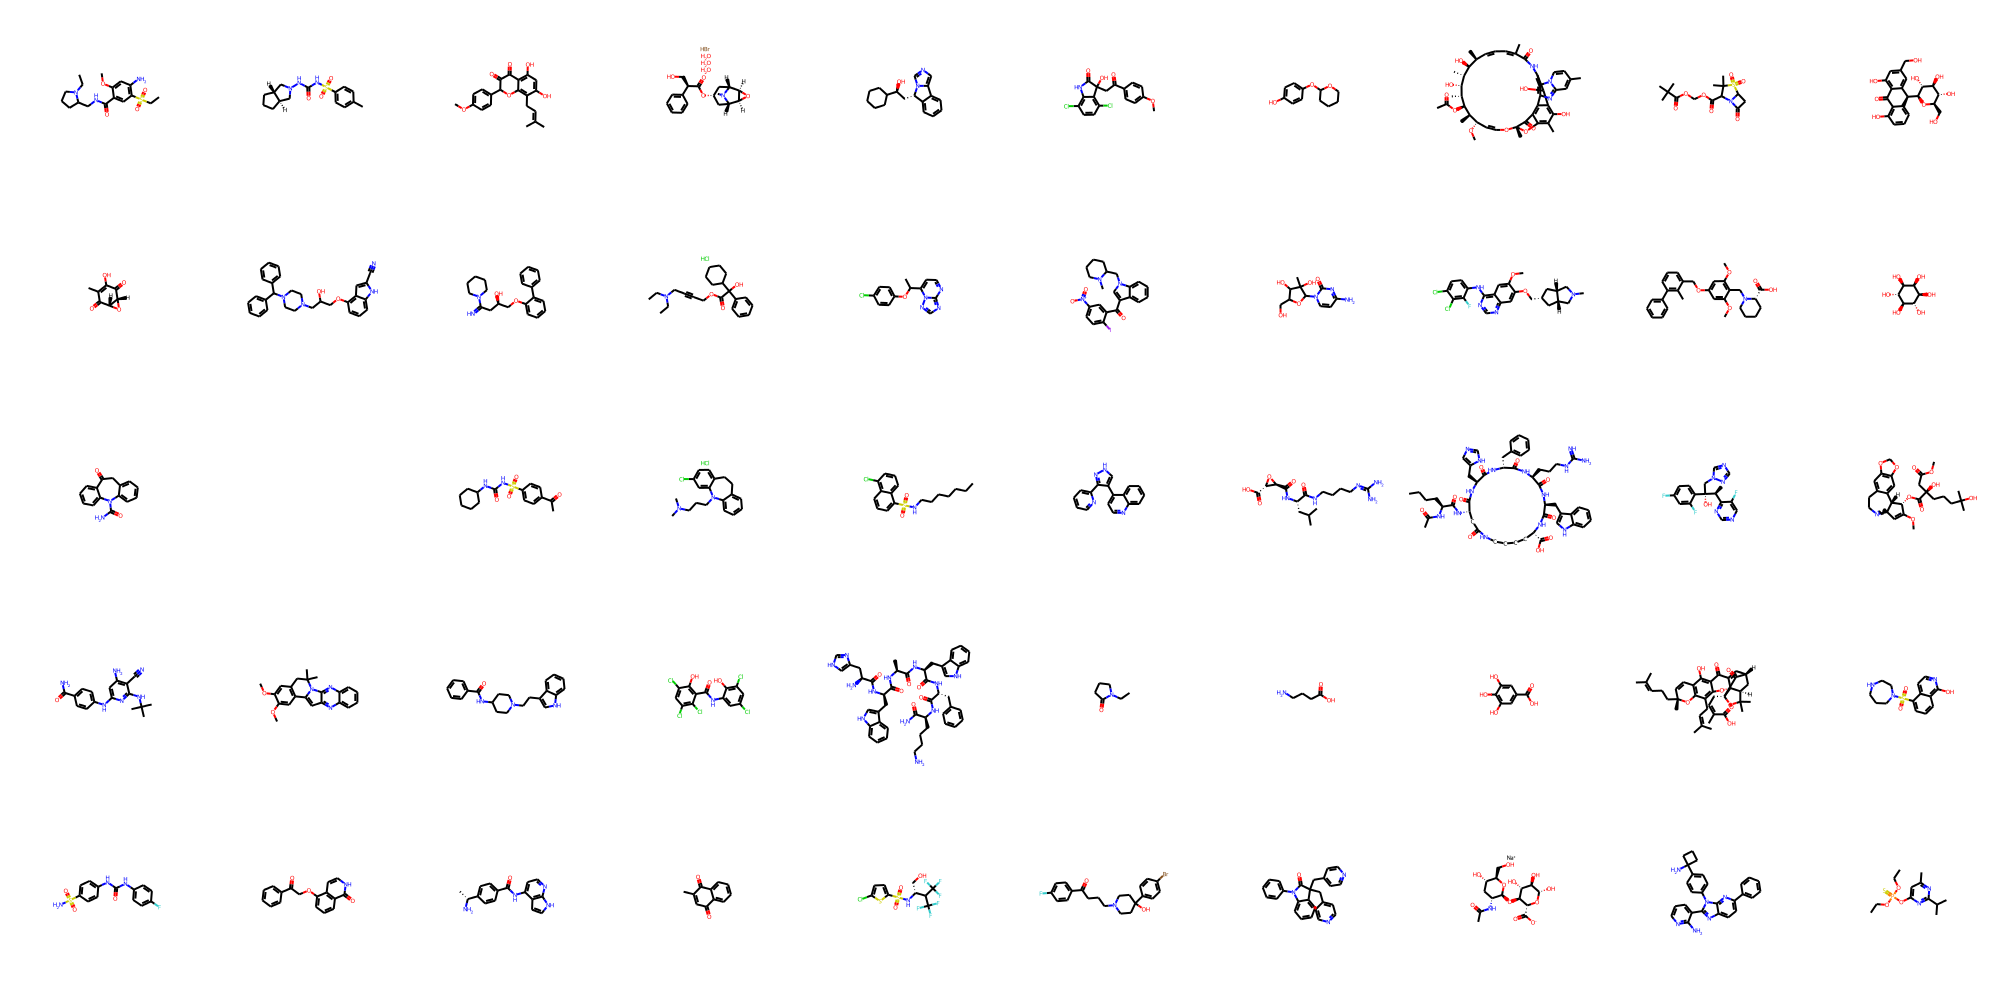

In [5116]:
smiles_list = [

'CCN1CCCC1CNC(=O)c1cc(S(=O)(=O)CC)c(N)cc1OC',
'Cc1ccc(S(=O)(=O)NC(=O)NN2C[C@H]3CCC[C@@H]3C2)cc1',
'COc1ccc(C2Oc3c(CC=C(C)C)c(O)cc(O)c3C(=O)C2=O)cc1',
'Br.CN1[C@H]2C[C@H](OC(=O)[C@H](CO)c3ccccc3)C[C@@H]1[C@H]1O[C@@H]21.O.O.O',
'O[C@@H](C[C@H]1c2ccccc2-c2cncn21)C1CCCCC1',
'COc1ccc(C(=O)CC2(O)C(=O)Nc3c(Cl)ccc(Cl)c32)cc1',
'Oc1ccc(OC2CCCCO2)cc1',
'CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4c(O)c(c5c(nc6cc(C)ccn65)c4c3C2=O)NC(=O)/C(C)=C\C=C\[C@H](C)[C@H](O)[C@@H](C)[C@@H](O)[C@@H](C)[C@H](OC(C)=O)[C@@H]1C',
'CC(C)(C)C(=O)OCOC(=O)C1N2C(=O)CC2S(=O)(=O)C1(C)C',
'O=C1c2c(O)cccc2[C@H]([C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2O)c2cc(CO)cc(O)c21',
'CC1=C(O)C(=O)[C@@H]2O[C@@H]2C1=O',
'N#Cc1cc2c(OCC(O)CN3CCN(C(c4ccccc4)c4ccccc4)CC3)cccc2[nH]1',
'N=C(C[C@@H](O)COc1ccccc1-c1ccccc1)N1CCCCC1',
'CCN(CC)CC#CCOC(=O)C(O)(c1ccccc1)C1CCCCC1.Cl',
'CC(Oc1ccc(Cl)cc1)c1ccnc2ncnn12',
'CN1CCCCC1Cn1cc(C(=O)c2cc([N+](=O)[O-])ccc2I)c2ccccc21',
'CC1(O)C(O)C(CO)OC1n1ccc(N)nc1=O',
'COc1cc2c(Nc3ccc(Cl)c(Cl)c3F)ncnc2cc1OC[C@@H]1C[C@@H]2CN(C)C[C@@H]2C1',
'COc1cc(OCc2cccc(-c3ccccc3)c2C)cc(OC)c1CN1CCCC[C@H]1C(=O)O',
'O[C@H]1[C@H](O)[C@@H](O)[C@H](O)[C@@H](O)[C@H]1O',
'NC(=O)N1c2ccccc2CC(=O)c2ccccc21',
'No Data',
'CC(=O)c1ccc(S(=O)(=O)NC(=O)NC2CCCCC2)cc1',
'CN(C)CCCN1c2ccccc2CCc2ccc(Cl)cc21.Cl',
'CCCCCCCNS(=O)(=O)c1cccc2c(Cl)cccc12',
'c1ccc(-c2n[nH]cc2-c2ccnc3ccccc23)nc1',
'CC(C)C[C@H](NC(=O)[C@@H]1O[C@H]1C(=O)O)C(=O)NCCCCN=C(N)N',
'CCCC[C@H](NC(C)=O)C(=O)N[C@H]1CC(=O)NCCCC[C@@H](C(=O)O)NC(=O)[C@H](Cc2c[nH]c3ccccc23)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@@H](Cc2ccccc2)NC(=O)[C@H](Cc2cnc[nH]2)NC1=O',
'C[C@@H](c1ncncc1F)[C@](O)(Cn1cncn1)c1ccc(F)cc1F',
'COC(=O)C[C@](O)(CCCC(C)(C)O)C(=O)O[C@@H]1C(OC)=C[C@]23CCCN2CCc2cc4c(cc2[C@H]13)OCO4',
'CC(C)(C)Nc1nc(Nc2ccc(C(N)=O)cc2)cc(N)c1C#N',
'COc1cc2c(cc1OC)-c1cc3nc4ccccc4nc3n1C(C)(C)C2',
'O=C(NC1CCN(CCc2c[nH]c3ccccc23)CC1)c1ccccc1',
'O=C(Nc1cc(Cl)cc(Cl)c1O)c1c(O)c(Cl)cc(Cl)c1Cl',
'C[C@H](NC(=O)[C@@H](Cc1c[nH]c2ccccc12)NC(=O)[C@@H](N)Cc1c[nH]cn1)C(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(=O)N[C@H](Cc1ccccc1)C(=O)N[C@@H](CCCCN)C(N)=O',
'CCN1CCCC1=O',
'NCCCC(=O)O',
'O=C(O)c1cc(O)c(O)c(O)c1',
'CC(C)=CCC[C@]1(C)C=Cc2c(O)c3c(c(CC=C(C)C)c2O1)O[C@]12C(=C[C@@H]4C[C@H]1C(C)(C)O[C@@]2(C/C=C(/C)C(=O)O)C4=O)C3=O',
'O=S(=O)(c1cccc2c(O)nccc12)N1CCCNCC1',
'NS(=O)(=O)c1ccc(NC(=O)Nc2ccc(F)cc2)cc1',
'O=C(COc1cccc2c(=O)[nH]ccc12)c1ccccc1',
'C[C@@H](N)c1ccc(C(=O)Nc2ccnc3[nH]ccc23)cc1',
'CC1=CC(=O)c2ccccc2C1=O',
'O=S(=O)(N[C@H](CO)C(C(F)(F)F)C(F)(F)F)c1ccc(Cl)s1',
'O=C(CCCN1CCC(O)(c2ccc(Br)cc2)CC1)c1ccc(F)cc1',
'O=C1N(c2ccccc2)c2ccccc2C1(Cc1ccncc1)Cc1ccncc1',
'CC(=O)N[C@@H]1C[C@H](O)[C@@H](CO)O[C@H]1O[C@@H]1[C@@H](C(=O)[O-])O[C@@H](O)[C@H](O)[C@H]1O.[Na+]',
'Nc1ncccc1-c1nc2ccc(-c3ccccc3)nc2n1-c1ccc(C2(N)CCC2)cc1',
'CCOP(=S)(OCC)Oc1cc(C)nc(C(C)C)n1',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



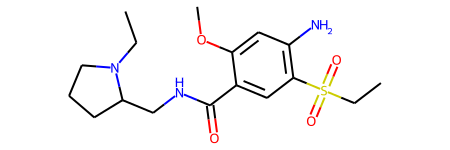

In [5117]:
M1 = mol_list [0]
M1

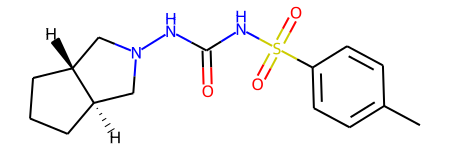

In [5118]:
M2 = mol_list [1]
M2

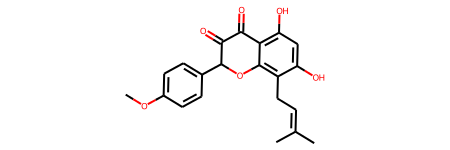

In [5119]:
M3 = mol_list [2]
M3

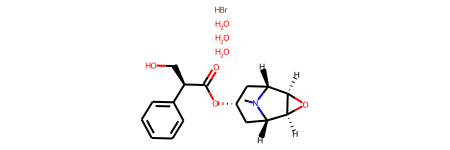

In [5120]:
M4 = mol_list [3]
M4

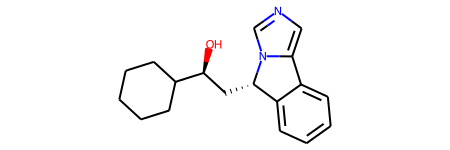

In [5121]:
M5 = mol_list [4]
M5

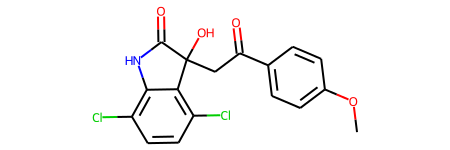

In [5122]:
M6 = mol_list [5]
M6

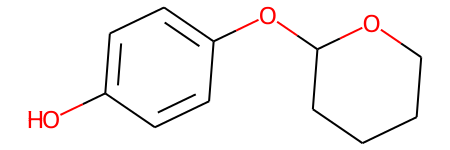

In [5123]:
M7 = mol_list [6]
M7

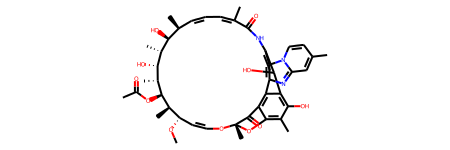

In [5124]:
M8 = mol_list [7]
M8

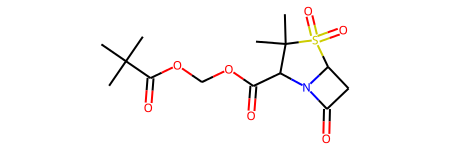

In [5125]:
M9 = mol_list [8]
M9

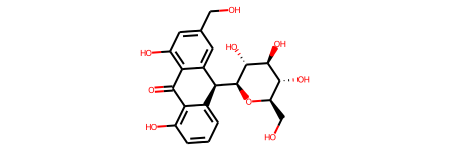

In [5126]:
M10 = mol_list [9]
M10

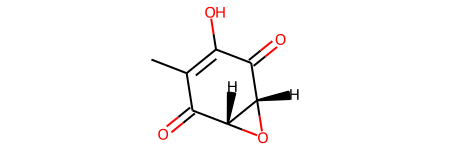

In [5127]:
M11 = mol_list [10]
M11

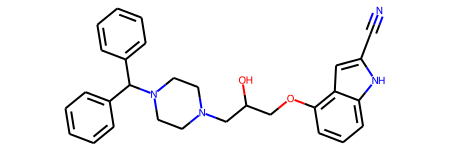

In [5128]:
M12 = mol_list [11]
M12

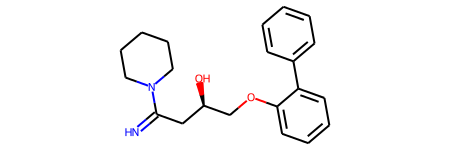

In [5129]:
M13 = mol_list [12]
M13

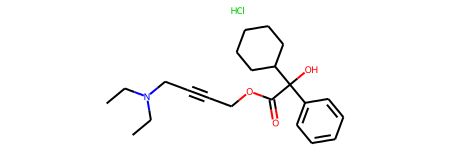

In [5130]:
M14 = mol_list [13]
M14

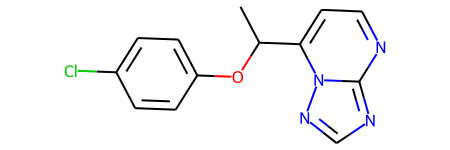

In [5131]:
M15 = mol_list [14]
M15

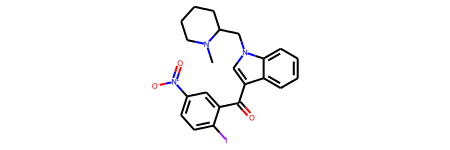

In [5132]:
M16 = mol_list [15]
M16

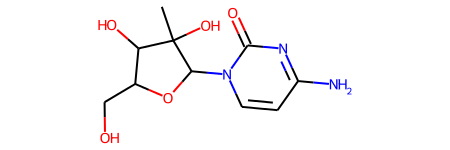

In [5133]:
M17 = mol_list [16]
M17

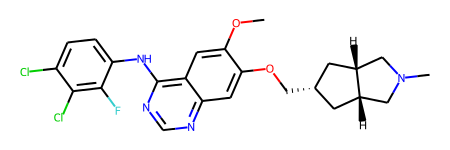

In [5134]:
M18 = mol_list [17]
M18

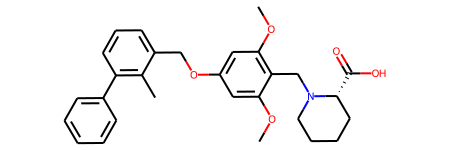

In [5135]:
M19 = mol_list [18]
M19

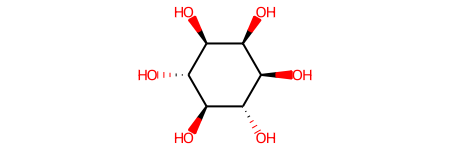

In [5136]:
M20 = mol_list [19]
M20

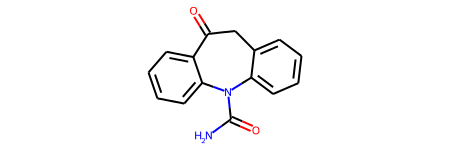

In [5137]:
M21 = mol_list [20]
M21

In [5138]:
M22 = mol_list [21]
M22

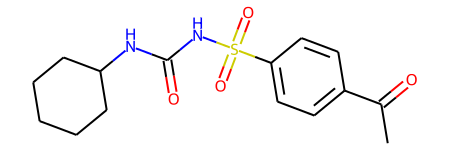

In [5139]:
M23 = mol_list [22]
M23

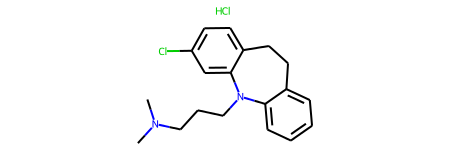

In [5140]:
M24 = mol_list [23]
M24

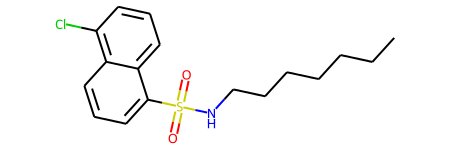

In [5141]:
M25 = mol_list [24]
M25

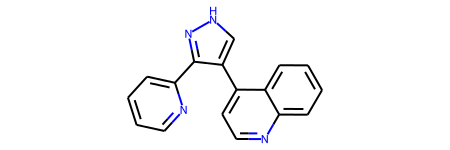

In [5142]:
M26 = mol_list [25]
M26

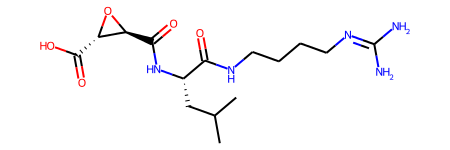

In [5143]:
M27 = mol_list [26]
M27

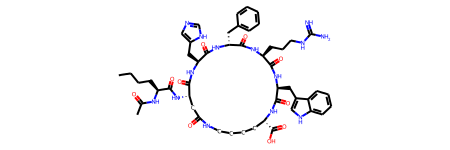

In [5144]:
M28 = mol_list [27]
M28

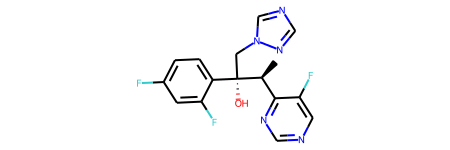

In [5145]:
M29 = mol_list [28]
M29

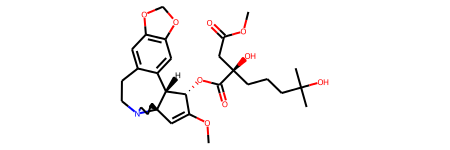

In [5146]:
M30 = mol_list [29]
M30

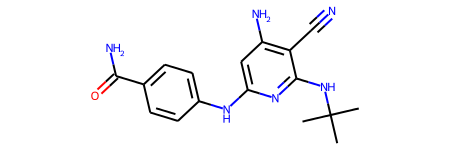

In [5147]:
M31 = mol_list [30]
M31

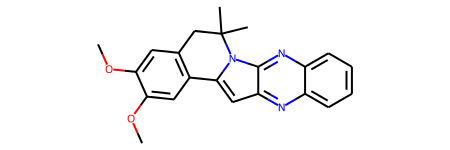

In [5148]:
M32 = mol_list [31]
M32

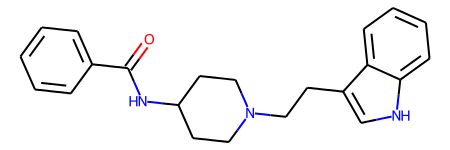

In [5149]:
M33 = mol_list [32]
M33

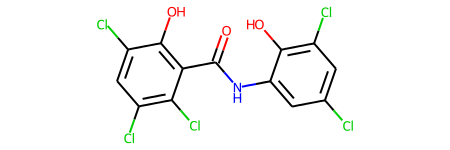

In [5150]:
M34 = mol_list [33]
M34

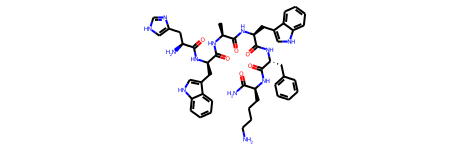

In [5151]:
M35 = mol_list [34]
M35

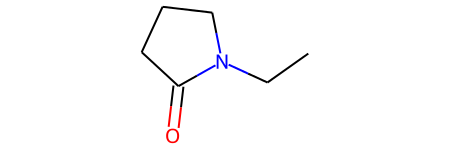

In [5152]:
M36 = mol_list [35]
M36

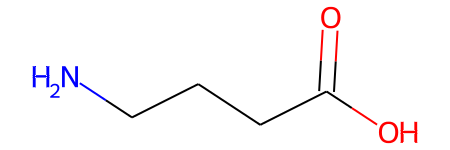

In [5153]:
M37= mol_list [36]
M37

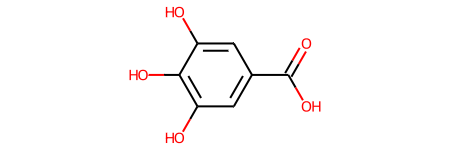

In [5154]:
M38= mol_list [37]
M38

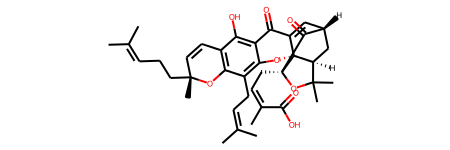

In [5155]:
M39= mol_list [38]
M39

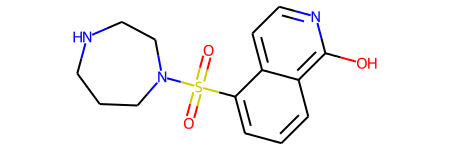

In [5156]:
M40= mol_list [39]
M40

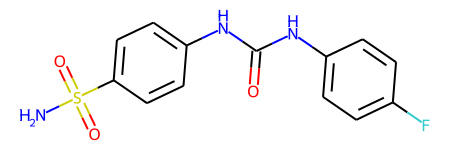

In [5157]:
M41= mol_list [40]
M41

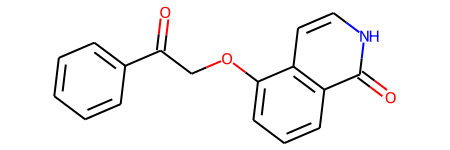

In [5158]:
M42= mol_list [41]
M42

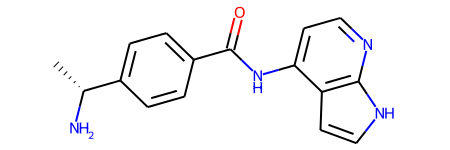

In [5159]:
M43= mol_list [42]
M43

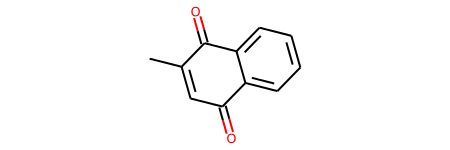

In [5160]:
M44= mol_list [43]
M44

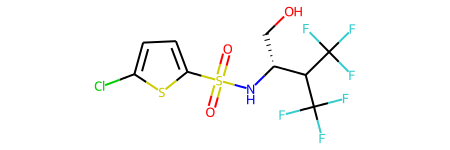

In [5161]:
M45= mol_list [44]
M45

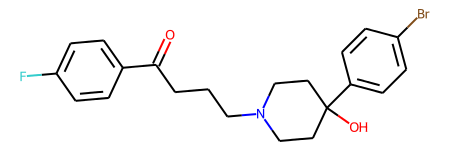

In [5162]:
M46= mol_list [45]
M46

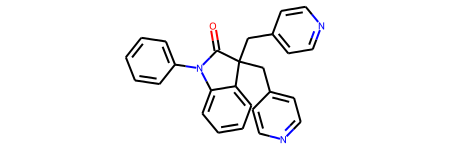

In [5163]:
M47= mol_list [46]
M47

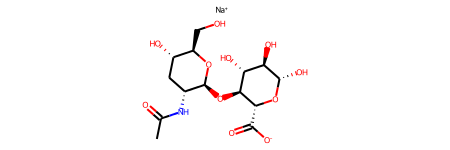

In [5164]:
M48= mol_list [47]
M48

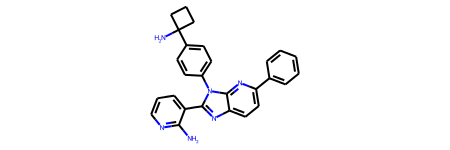

In [5165]:
M49= mol_list [48]
M49

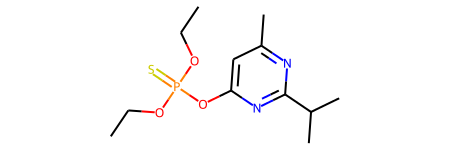

In [5166]:
M50= mol_list [49]
M50

In [5167]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[4,
 33,
 34,
 71,
 80,
 128,
 147,
 150,
 186,
 197,
 230,
 249,
 258,
 268,
 283,
 293,
 294,
 301,
 343,
 350,
 356,
 392,
 398,
 433,
 446,
 452,
 456,
 486,
 512,
 519,
 528,
 580,
 635,
 650,
 676,
 690,
 695,
 738,
 807,
 841,
 849,
 875,
 893,
 910,
 926,
 935,
 946,
 967,
 994,
 998,
 1019]

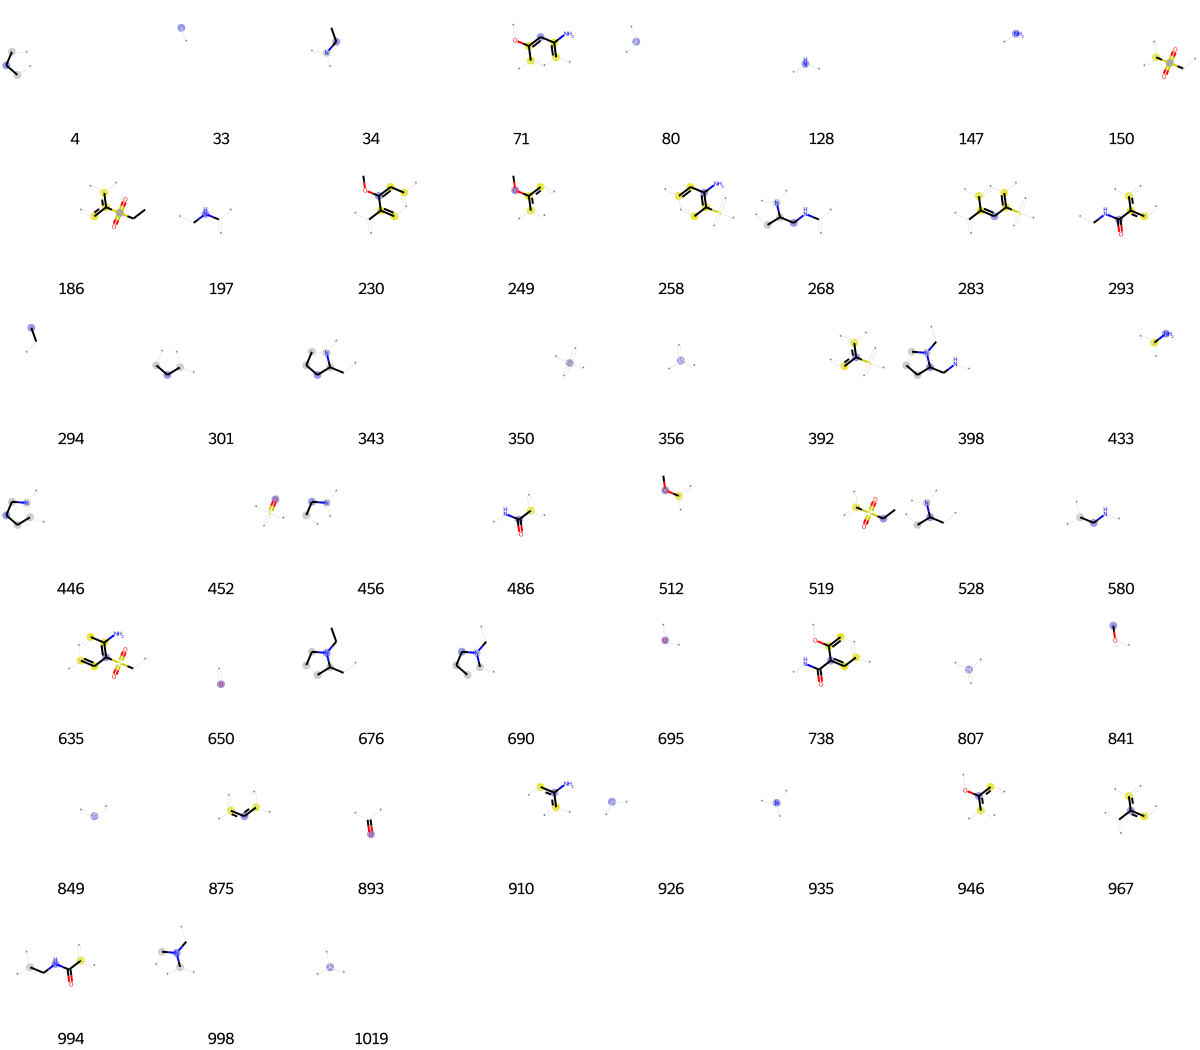

In [5168]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [5169]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[4,
 33,
 39,
 128,
 166,
 235,
 276,
 301,
 307,
 310,
 319,
 331,
 350,
 356,
 381,
 452,
 502,
 582,
 585,
 650,
 698,
 715,
 726,
 739,
 772,
 799,
 807,
 836,
 849,
 857,
 883,
 893,
 896,
 926,
 935,
 965,
 1019]

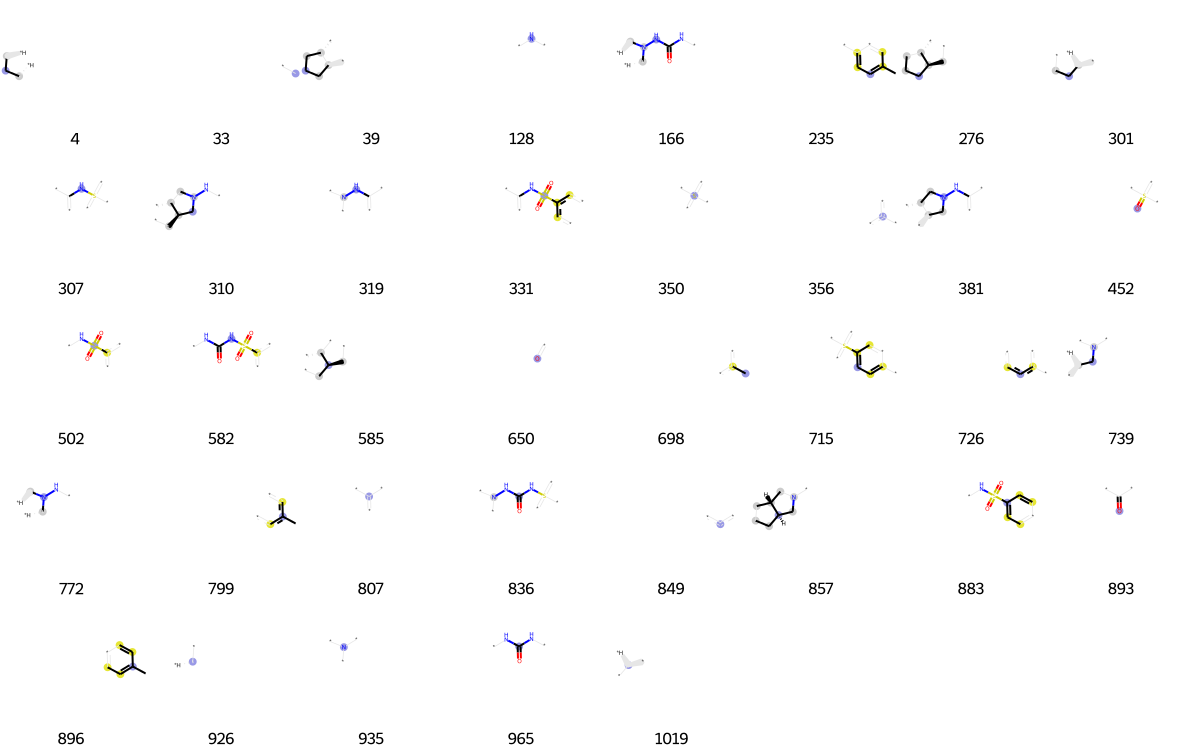

In [5170]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [5171]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[33,
 80,
 104,
 118,
 213,
 233,
 255,
 270,
 276,
 314,
 322,
 326,
 333,
 356,
 452,
 457,
 479,
 512,
 558,
 578,
 583,
 623,
 650,
 656,
 694,
 695,
 707,
 718,
 723,
 726,
 750,
 779,
 781,
 807,
 809,
 831,
 841,
 849,
 875,
 916,
 923,
 933,
 958,
 1010,
 1014,
 1017,
 1019]

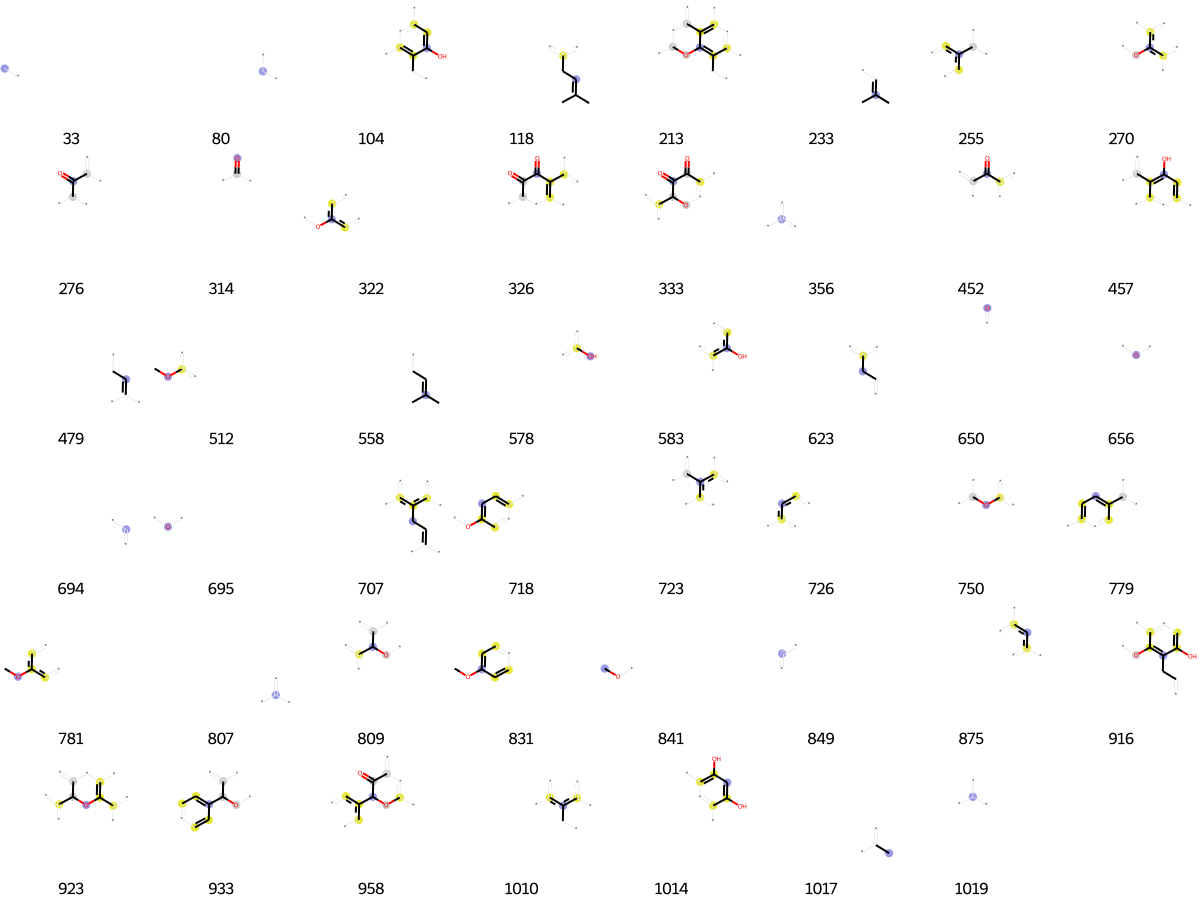

In [5172]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [5173]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[1,
 33,
 41,
 64,
 80,
 102,
 119,
 121,
 147,
 163,
 175,
 221,
 222,
 268,
 278,
 341,
 356,
 380,
 381,
 389,
 396,
 482,
 495,
 557,
 564,
 601,
 650,
 656,
 658,
 665,
 695,
 726,
 777,
 790,
 803,
 807,
 849,
 893,
 897,
 926,
 935,
 1019]

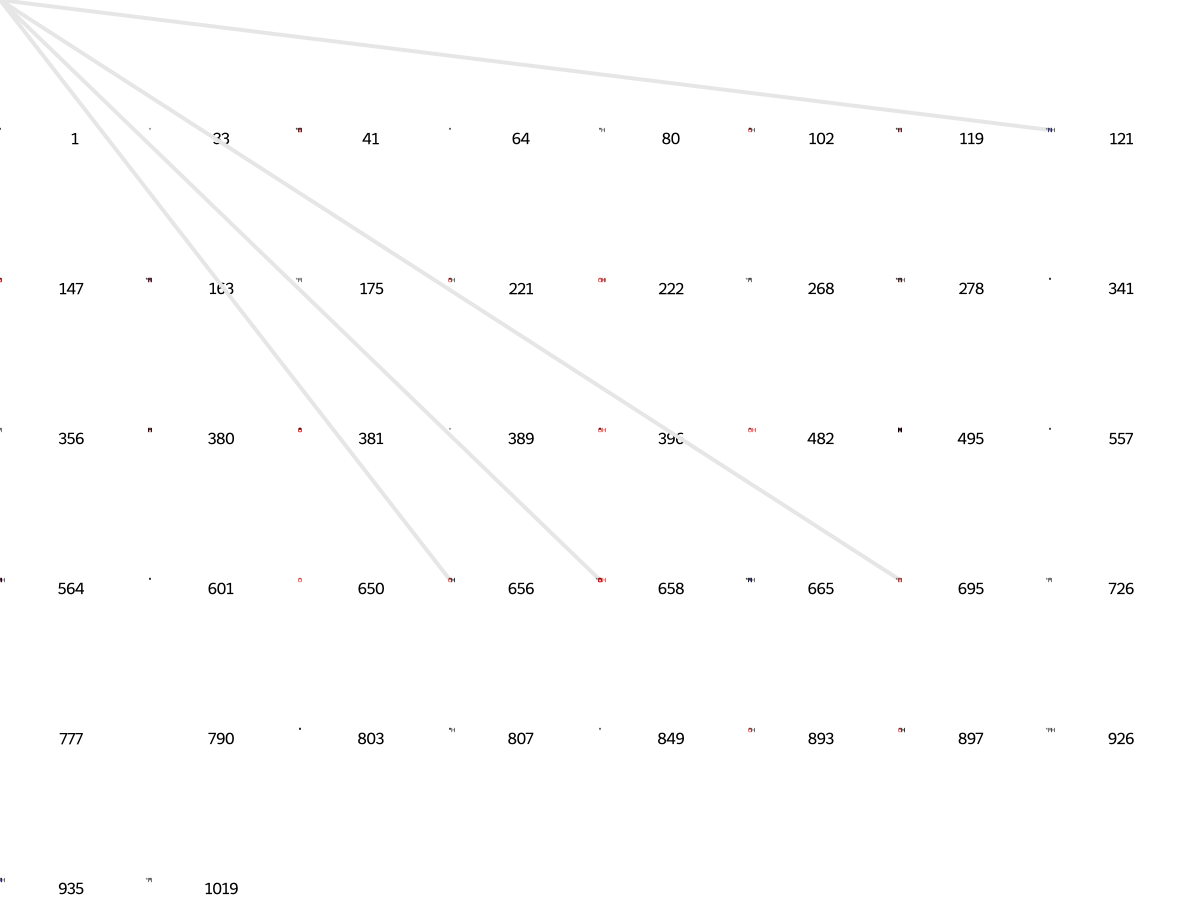

In [5174]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [5175]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[1,
 2,
 3,
 4,
 59,
 61,
 64,
 80,
 94,
 105,
 119,
 175,
 209,
 227,
 301,
 352,
 356,
 371,
 378,
 460,
 482,
 511,
 526,
 562,
 577,
 579,
 610,
 668,
 694,
 715,
 726,
 807,
 849,
 857,
 890,
 926,
 932,
 935,
 954,
 971,
 984,
 1019]

In [5176]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[15,
 33,
 36,
 80,
 90,
 130,
 153,
 173,
 297,
 307,
 314,
 322,
 356,
 361,
 366,
 382,
 496,
 512,
 561,
 594,
 650,
 659,
 666,
 669,
 673,
 695,
 702,
 713,
 718,
 726,
 781,
 807,
 831,
 841,
 849,
 856,
 892,
 893,
 901,
 951]

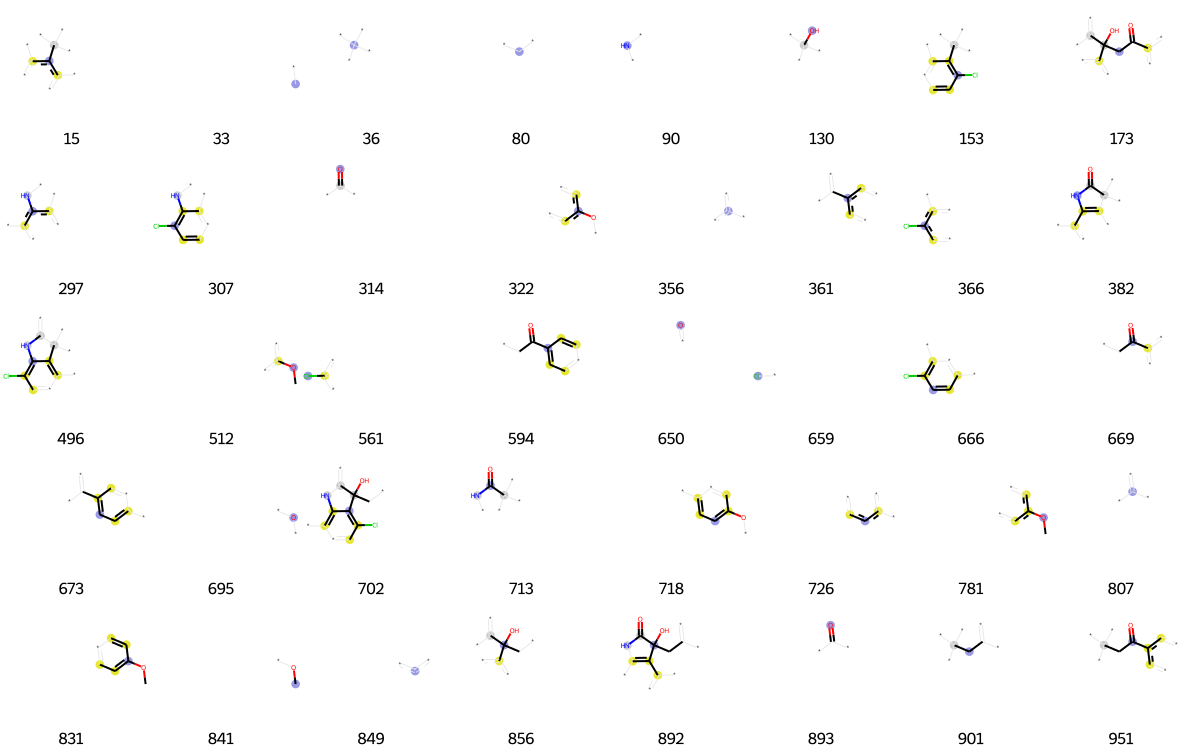

In [5177]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [5178]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[4,
 114,
 225,
 289,
 301,
 322,
 356,
 361,
 445,
 485,
 524,
 578,
 623,
 656,
 695,
 718,
 726,
 745,
 754,
 802,
 807,
 830,
 849,
 890,
 926,
 950,
 964,
 1019]

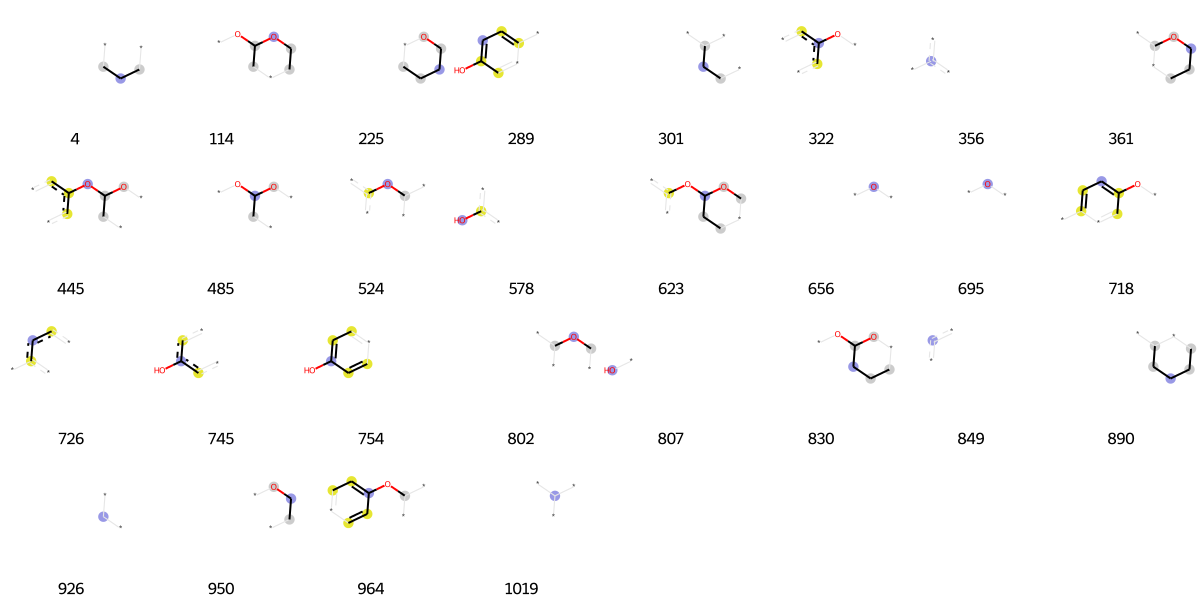

In [5179]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [5180]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[8,
 11,
 33,
 36,
 59,
 64,
 77,
 90,
 102,
 129,
 202,
 215,
 224,
 225,
 227,
 233,
 250,
 252,
 258,
 260,
 268,
 270,
 272,
 284,
 285,
 297,
 314,
 356,
 378,
 402,
 410,
 412,
 416,
 439,
 462,
 463,
 489,
 521,
 529,
 551,
 564,
 566,
 574,
 578,
 594,
 610,
 633,
 650,
 656,
 660,
 688,
 694,
 695,
 698,
 700,
 723,
 726,
 729,
 744,
 756,
 772,
 781,
 799,
 801,
 807,
 819,
 831,
 841,
 849,
 861,
 862,
 875,
 879,
 884,
 886,
 893,
 911,
 913,
 926,
 933,
 935,
 937,
 945,
 960,
 966,
 995,
 1013,
 1017,
 1019,
 1021]

In [5181]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[33,
 36,
 70,
 80,
 114,
 126,
 147,
 196,
 207,
 211,
 225,
 231,
 250,
 270,
 314,
 336,
 356,
 372,
 392,
 469,
 534,
 553,
 650,
 664,
 673,
 684,
 695,
 734,
 753,
 767,
 772,
 798,
 807,
 893,
 923,
 926,
 932,
 935,
 964,
 970,
 1019]

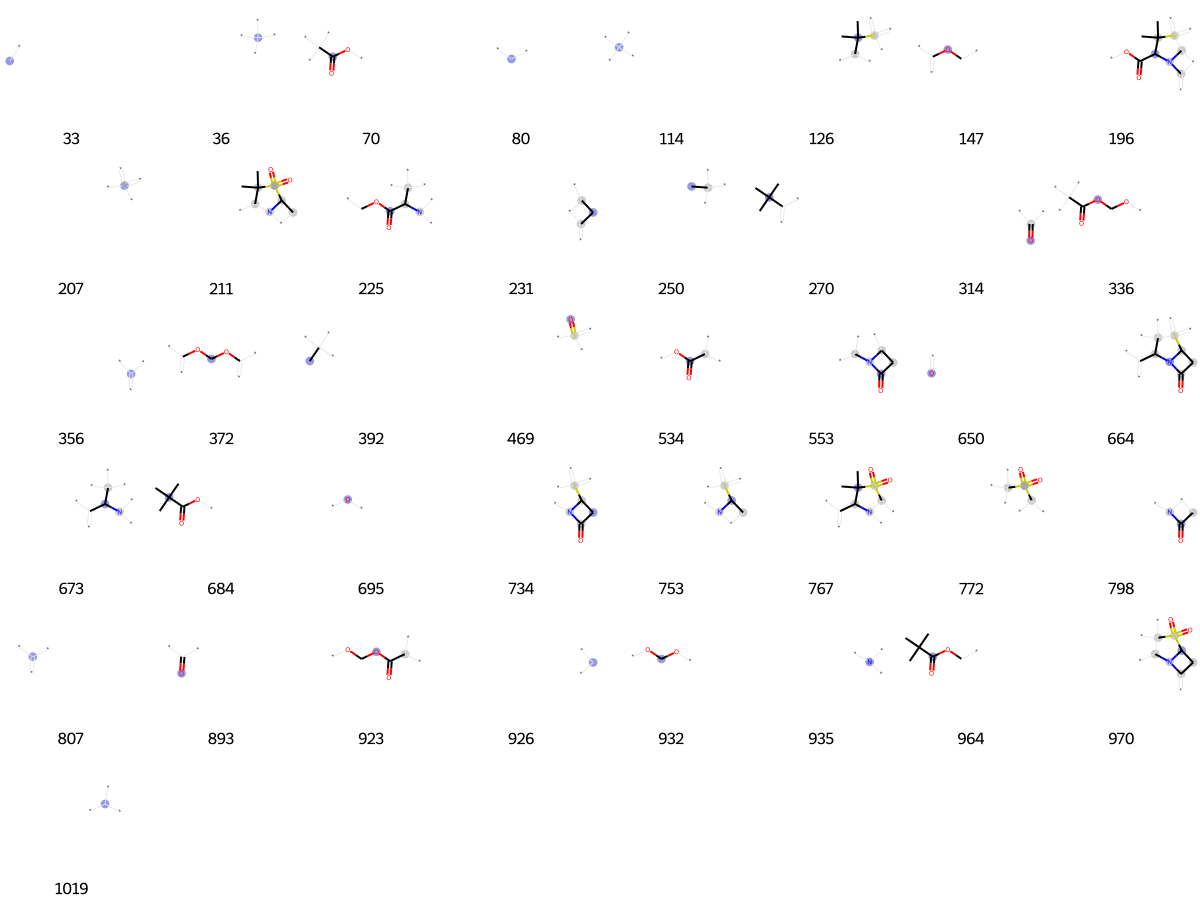

In [5182]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [5183]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[3,
 13,
 15,
 58,
 64,
 80,
 126,
 130,
 193,
 210,
 221,
 222,
 233,
 314,
 332,
 356,
 371,
 429,
 447,
 452,
 457,
 463,
 492,
 578,
 583,
 587,
 610,
 650,
 656,
 723,
 726,
 730,
 740,
 807,
 820,
 833,
 837,
 842,
 849,
 875,
 879,
 897,
 922,
 1019]

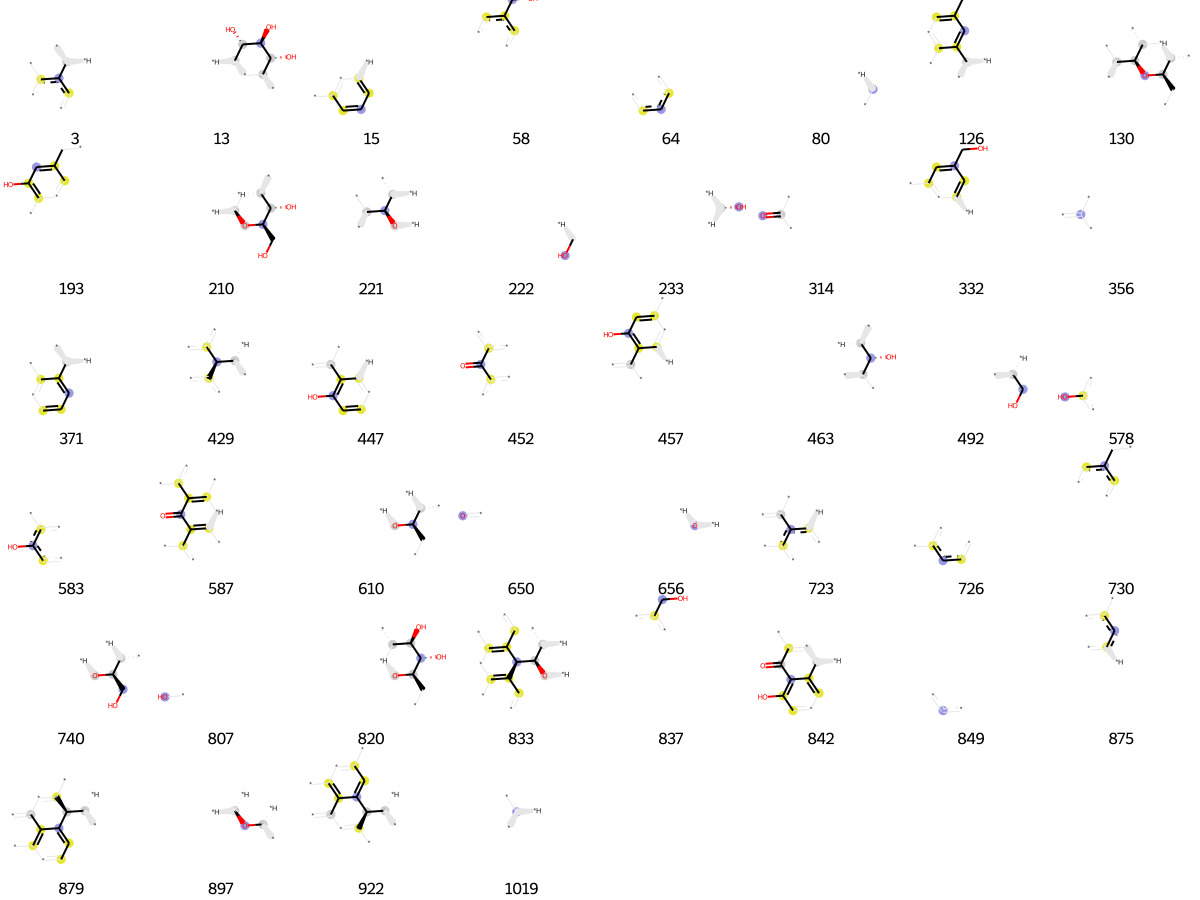

In [5184]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [5185]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[2,
 14,
 33,
 64,
 69,
 134,
 201,
 276,
 314,
 356,
 358,
 365,
 578,
 650,
 656,
 698,
 807,
 897,
 972,
 1019]

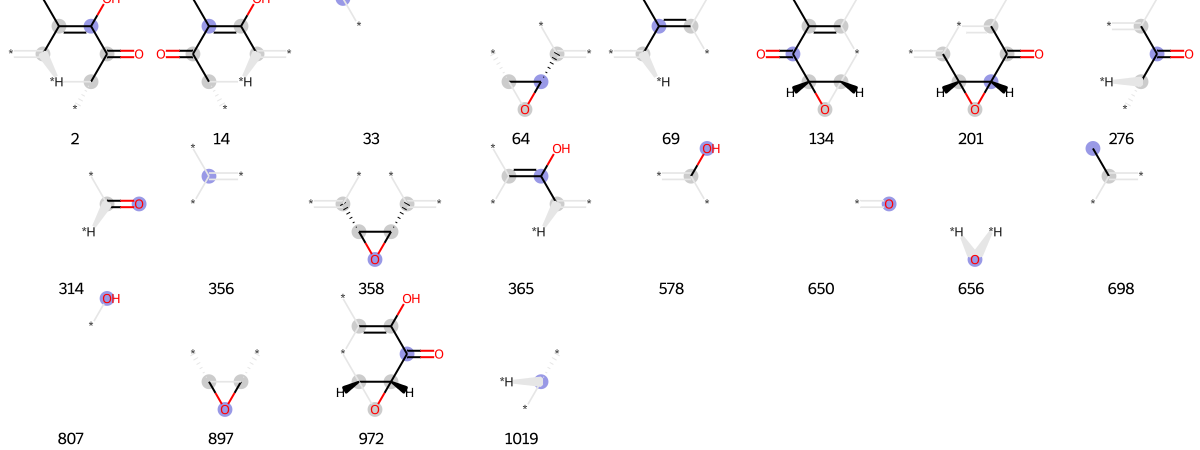

In [5186]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [5187]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[1,
 15,
 44,
 64,
 74,
 80,
 90,
 112,
 118,
 119,
 123,
 175,
 186,
 208,
 227,
 241,
 275,
 297,
 329,
 333,
 340,
 341,
 356,
 360,
 386,
 389,
 428,
 456,
 461,
 465,
 557,
 566,
 597,
 603,
 658,
 674,
 695,
 721,
 726,
 759,
 767,
 790,
 807,
 849,
 875,
 882,
 898,
 926,
 935,
 946,
 1014]

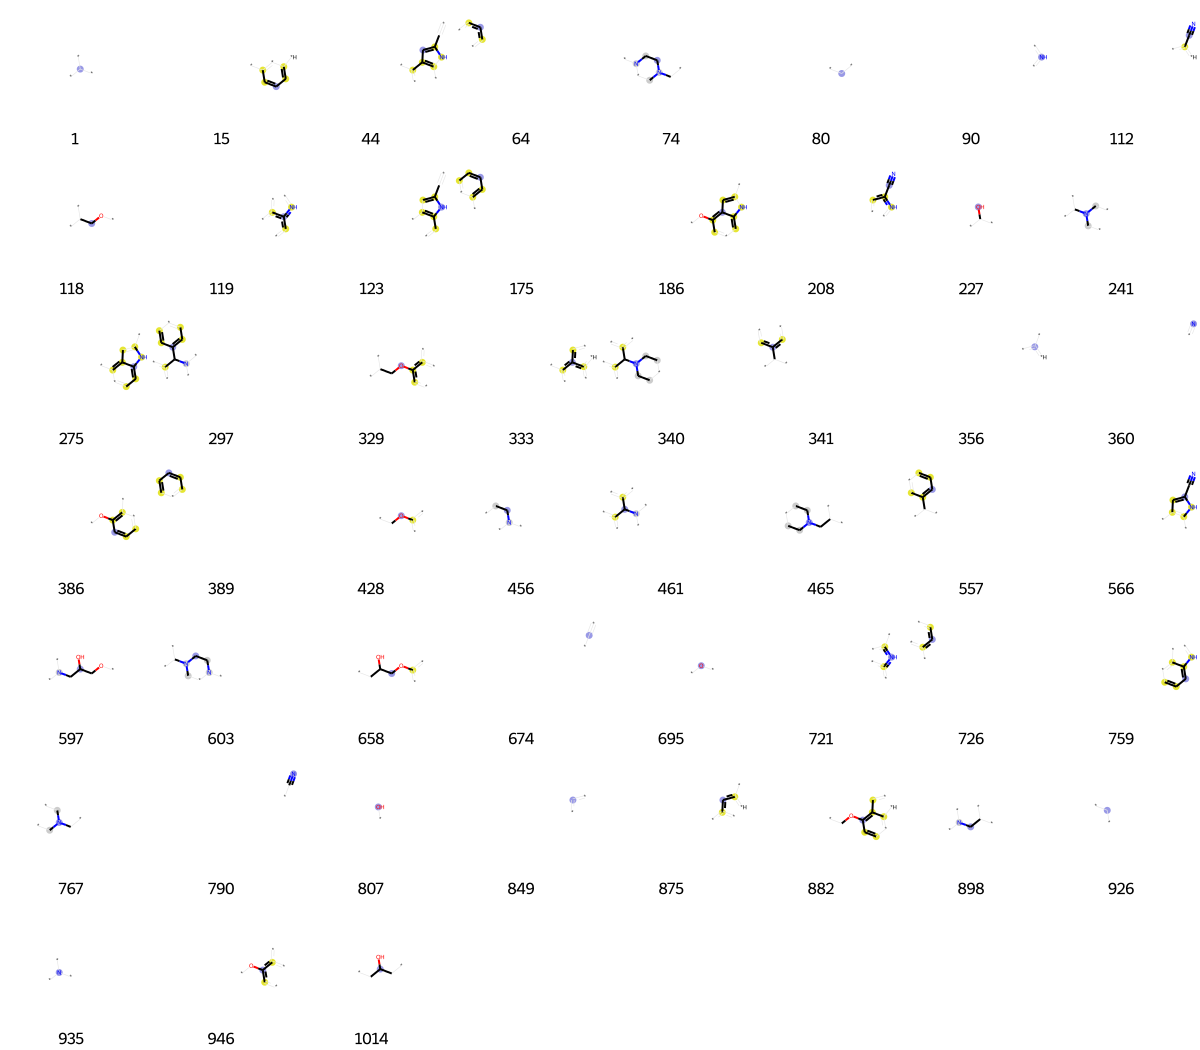

In [5188]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [5189]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[1,
 2,
 4,
 23,
 64,
 80,
 118,
 136,
 175,
 222,
 227,
 266,
 329,
 352,
 356,
 369,
 386,
 389,
 428,
 456,
 601,
 623,
 658,
 695,
 726,
 736,
 807,
 813,
 849,
 864,
 916,
 926,
 935,
 946,
 974,
 977,
 984,
 985,
 1014,
 1019]

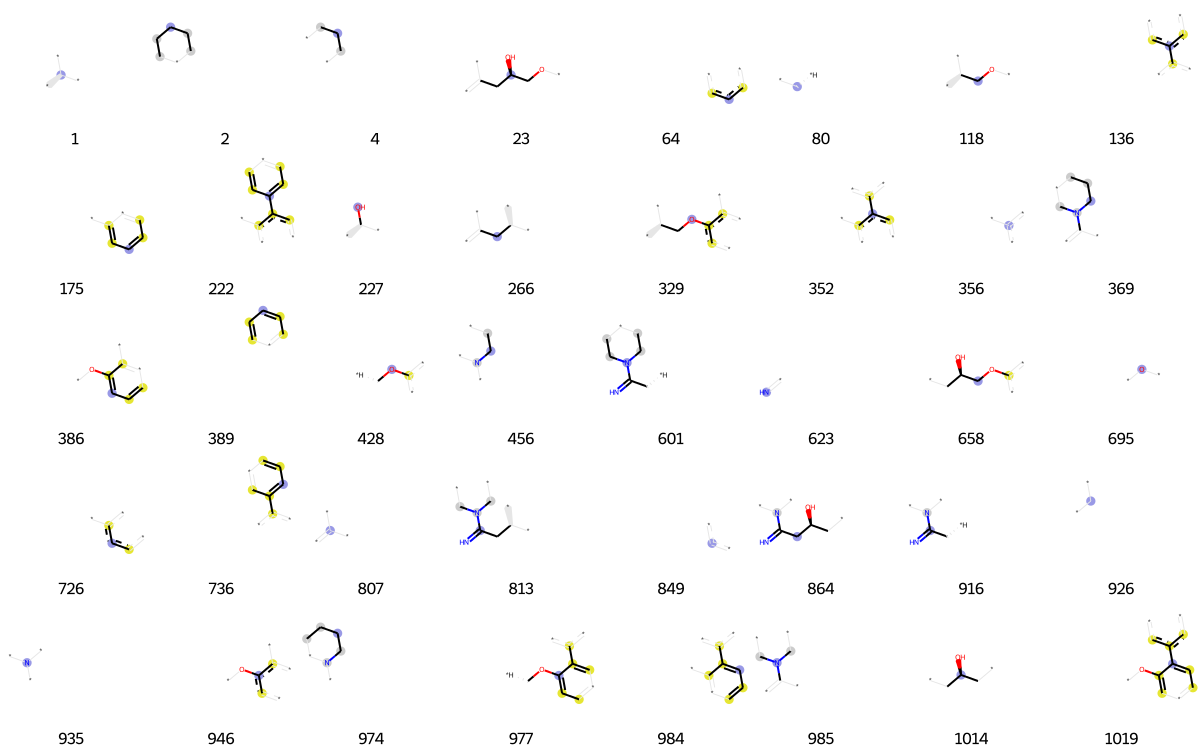

In [5190]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [5191]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[2,
 4,
 33,
 64,
 70,
 72,
 80,
 114,
 147,
 151,
 175,
 220,
 251,
 289,
 293,
 294,
 301,
 356,
 389,
 393,
 401,
 514,
 542,
 566,
 585,
 599,
 650,
 674,
 695,
 726,
 799,
 807,
 849,
 865,
 881,
 884,
 890,
 893,
 902,
 926,
 932,
 936,
 957,
 993,
 1000,
 1019]

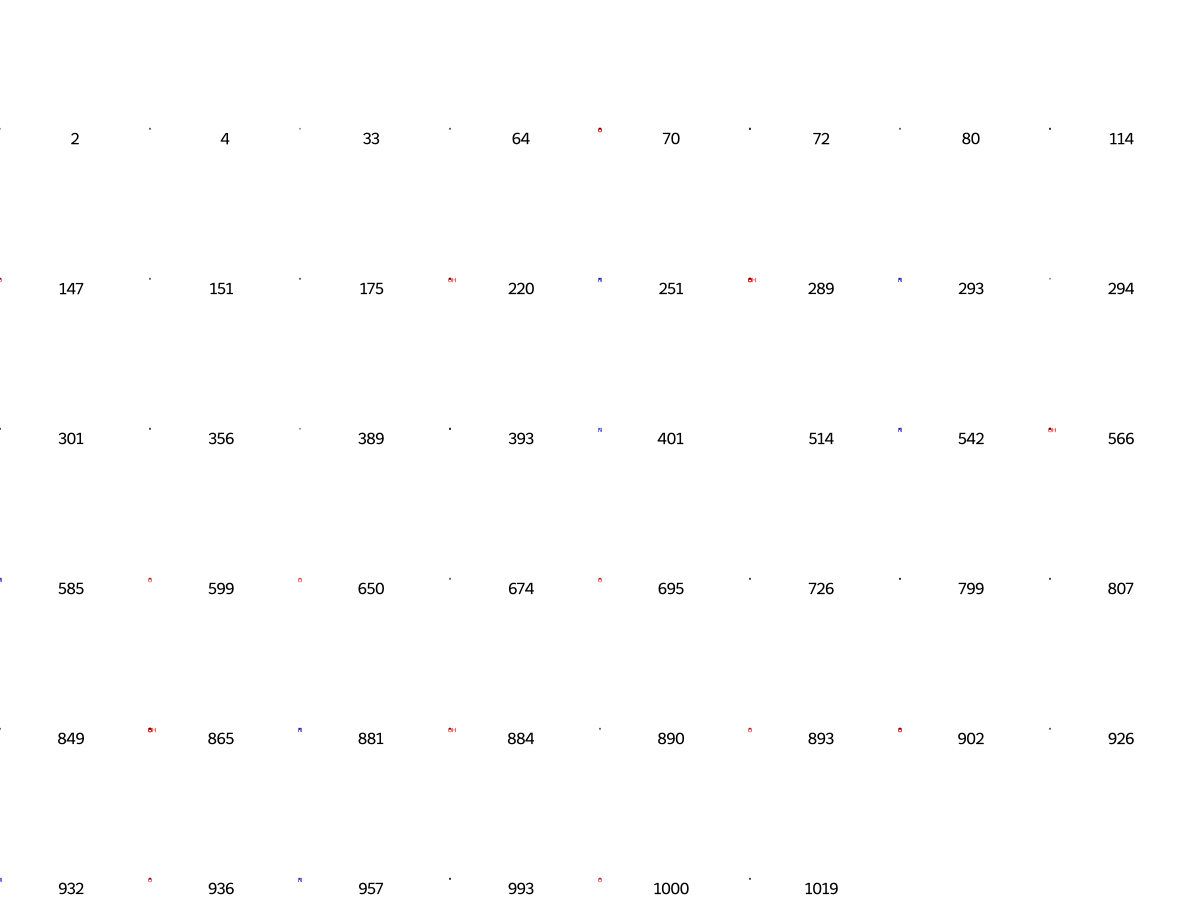

In [5192]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [5193]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[1,
 33,
 43,
 46,
 99,
 125,
 216,
 233,
 283,
 322,
 356,
 378,
 389,
 405,
 408,
 412,
 428,
 489,
 528,
 561,
 611,
 659,
 664,
 695,
 703,
 718,
 726,
 787,
 813,
 816,
 842,
 849,
 884,
 935,
 968,
 972,
 1014]

In [5194]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[4,
 9,
 11,
 33,
 45,
 61,
 64,
 80,
 102,
 121,
 171,
 175,
 201,
 214,
 250,
 261,
 301,
 333,
 343,
 356,
 430,
 431,
 456,
 464,
 479,
 486,
 528,
 549,
 555,
 562,
 582,
 650,
 661,
 715,
 726,
 746,
 753,
 785,
 790,
 807,
 838,
 849,
 875,
 890,
 893,
 908,
 916,
 926,
 935,
 939,
 947,
 949,
 951,
 964,
 967,
 974,
 1019]

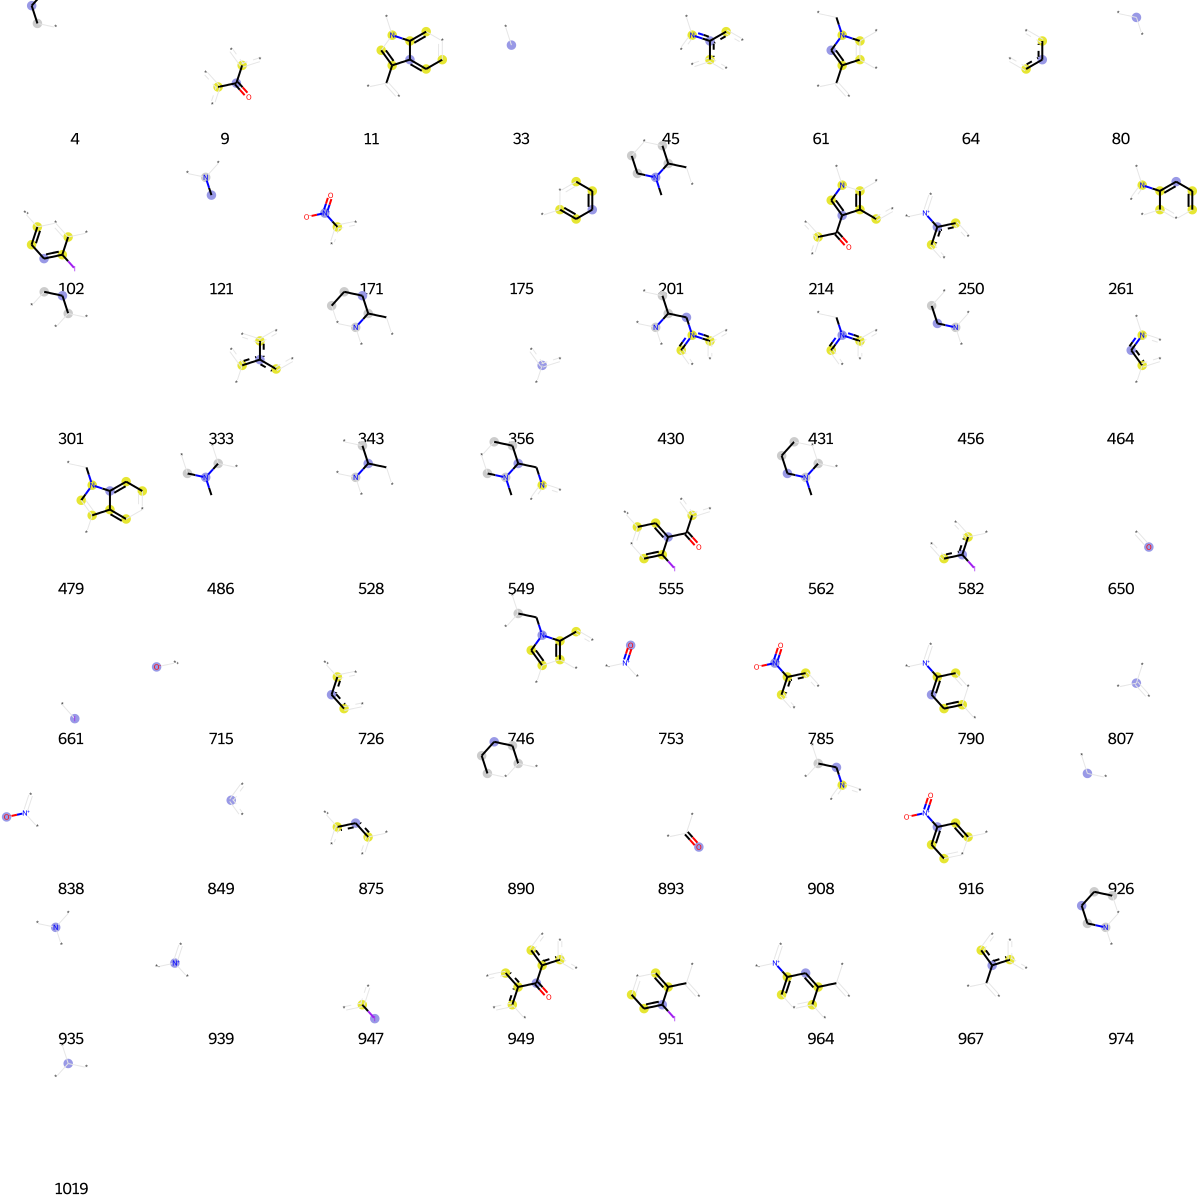

In [5195]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [5196]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[33,
 36,
 62,
 77,
 80,
 130,
 147,
 170,
 222,
 233,
 250,
 297,
 314,
 356,
 378,
 424,
 433,
 485,
 492,
 498,
 577,
 606,
 610,
 612,
 650,
 656,
 688,
 726,
 740,
 745,
 783,
 807,
 831,
 844,
 849,
 863,
 897,
 935,
 955,
 1018,
 1019]

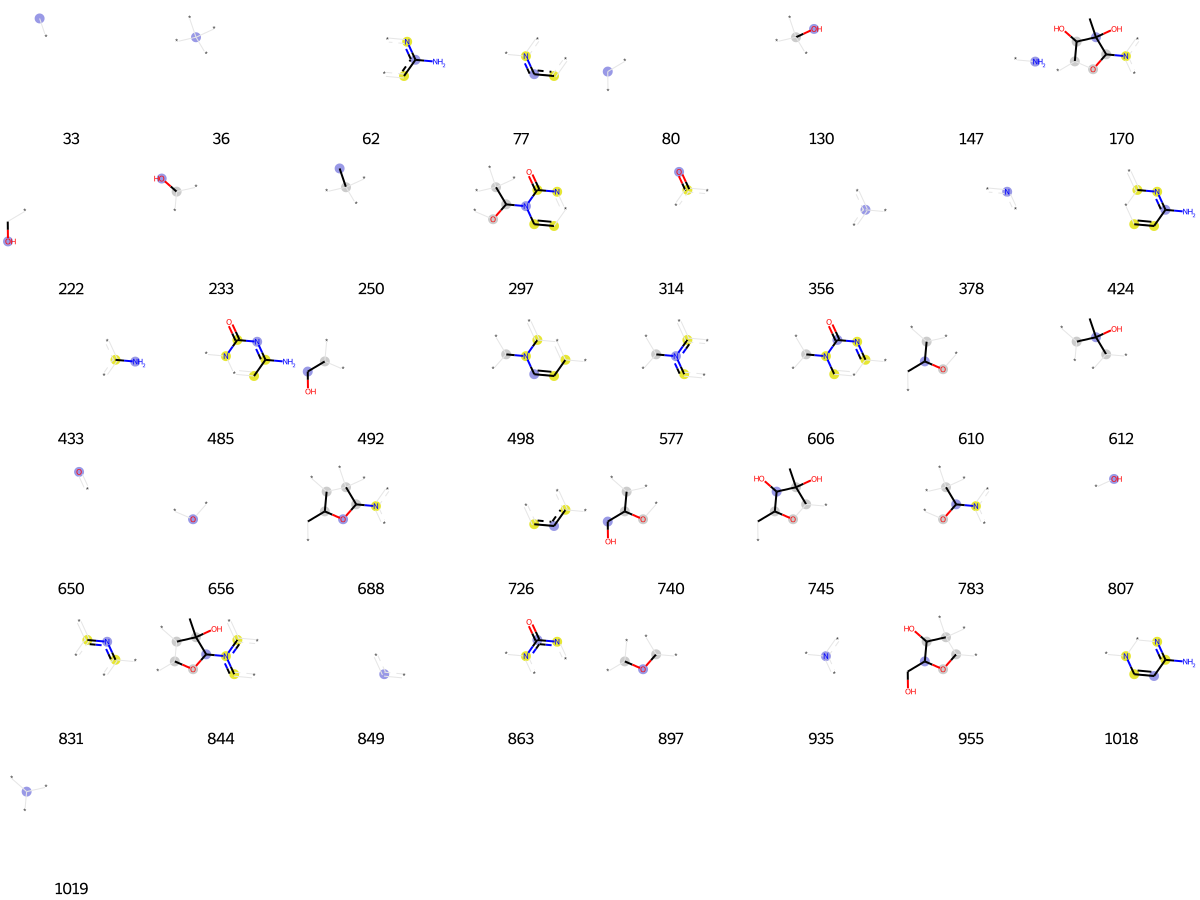

In [5197]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [5198]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[29,
 33,
 73,
 80,
 112,
 121,
 128,
 133,
 200,
 202,
 207,
 218,
 221,
 237,
 245,
 249,
 268,
 318,
 333,
 335,
 343,
 356,
 366,
 378,
 421,
 425,
 428,
 489,
 491,
 512,
 561,
 585,
 624,
 659,
 666,
 673,
 688,
 695,
 699,
 708,
 726,
 739,
 747,
 780,
 786,
 794,
 832,
 841,
 849,
 874,
 875,
 881,
 904,
 926,
 935,
 946,
 954,
 1005,
 1011,
 1019]

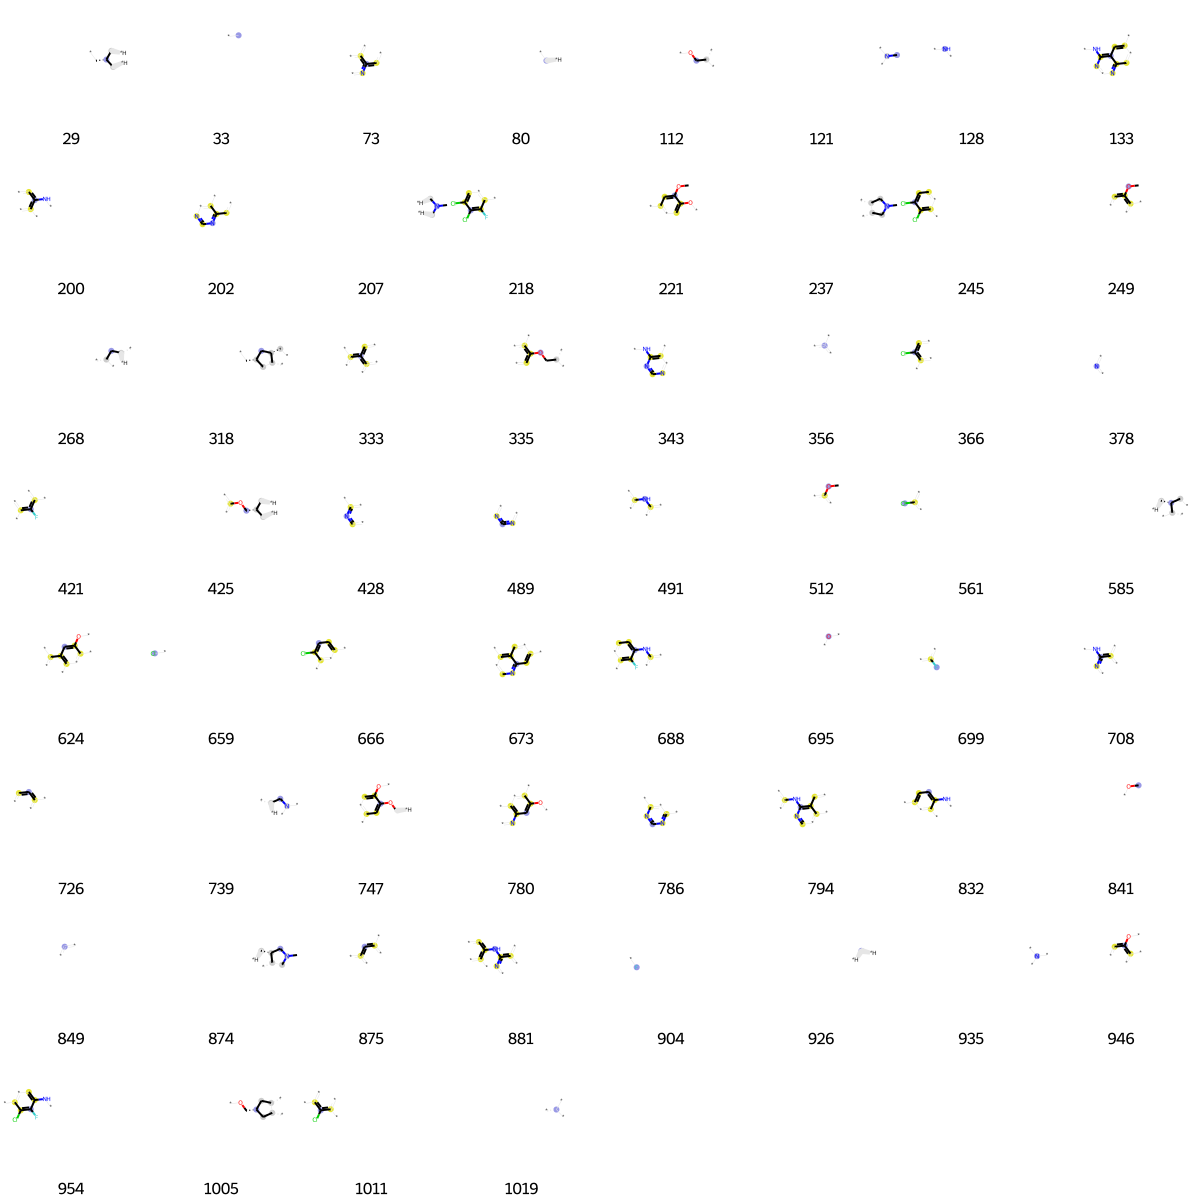

In [5199]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [5200]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[4,
 15,
 18,
 33,
 60,
 64,
 80,
 136,
 157,
 175,
 210,
 222,
 249,
 252,
 301,
 322,
 325,
 352,
 354,
 356,
 389,
 407,
 423,
 428,
 456,
 512,
 527,
 531,
 559,
 573,
 592,
 596,
 628,
 635,
 645,
 650,
 654,
 690,
 695,
 698,
 726,
 736,
 741,
 745,
 807,
 841,
 849,
 875,
 890,
 893,
 926,
 935,
 946,
 974,
 984,
 998,
 1010,
 1019]

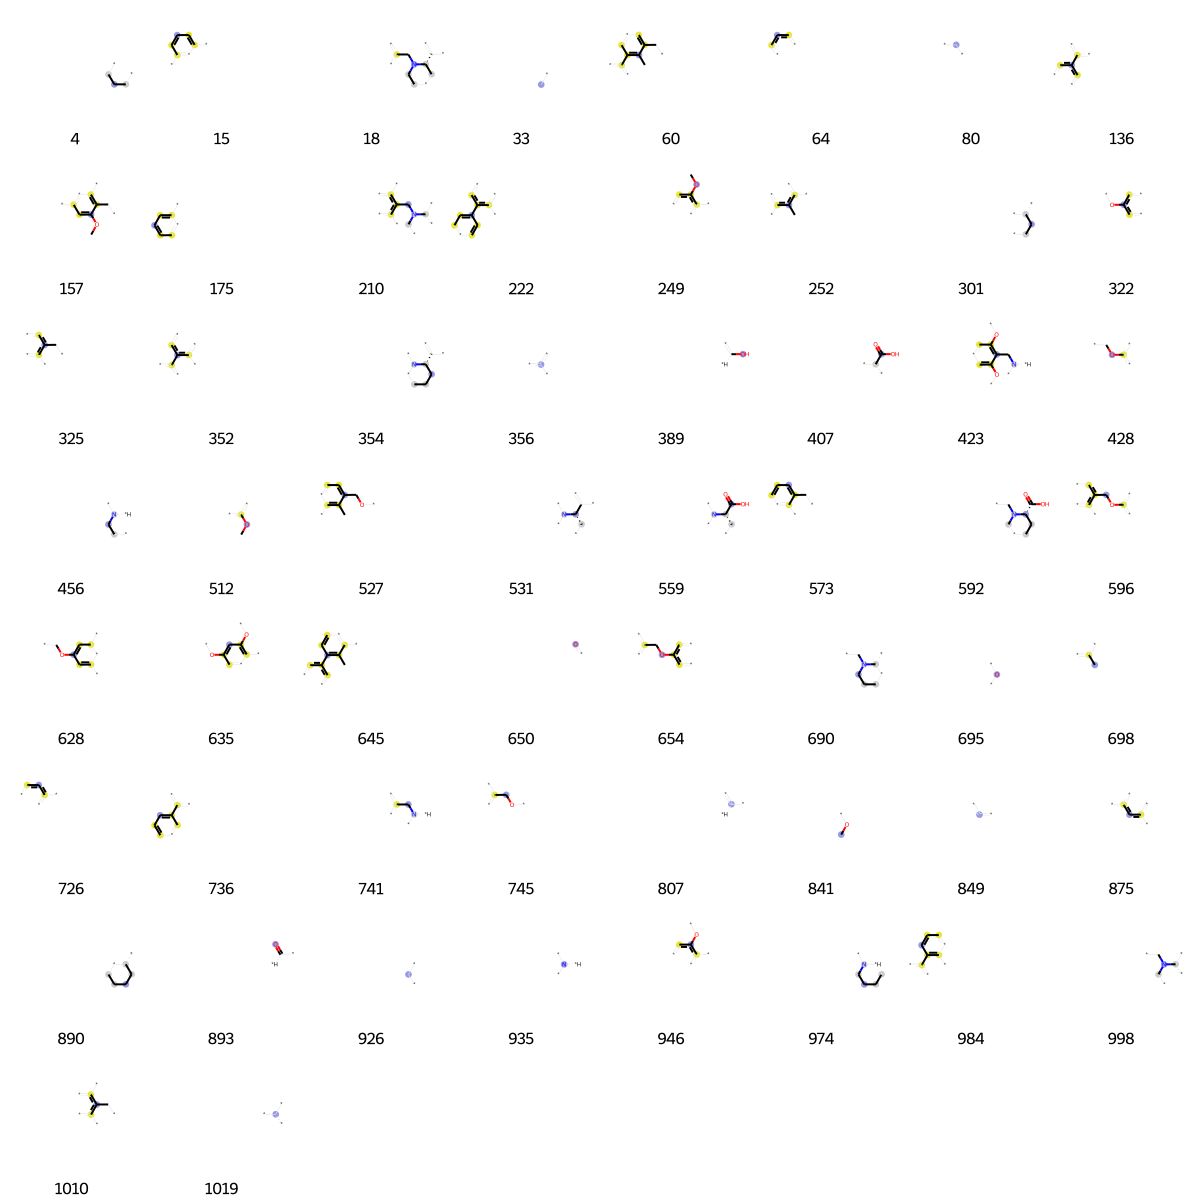

In [5201]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [5202]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[13, 233, 463, 807, 1019]

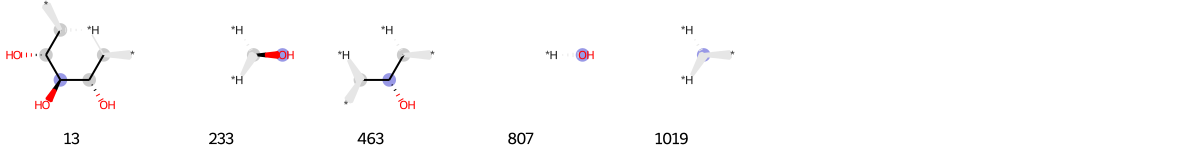

In [5203]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [5204]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


[20,
 42,
 64,
 129,
 140,
 147,
 175,
 212,
 271,
 300,
 314,
 352,
 356,
 405,
 435,
 461,
 540,
 623,
 650,
 684,
 715,
 726,
 751,
 807,
 849,
 893,
 926,
 935,
 984,
 1019]

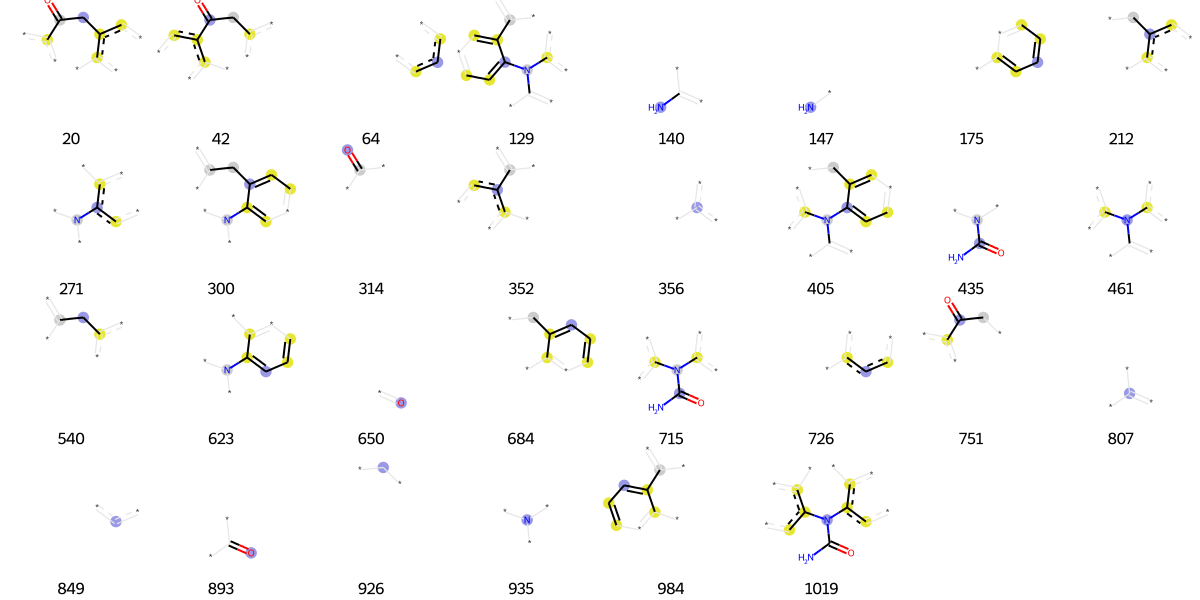

In [5205]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [5206]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[2,
 4,
 33,
 47,
 128,
 301,
 307,
 319,
 331,
 350,
 356,
 361,
 387,
 428,
 452,
 454,
 502,
 582,
 610,
 617,
 631,
 650,
 673,
 715,
 726,
 796,
 807,
 849,
 883,
 890,
 893,
 926,
 965,
 1017,
 1018,
 1019]

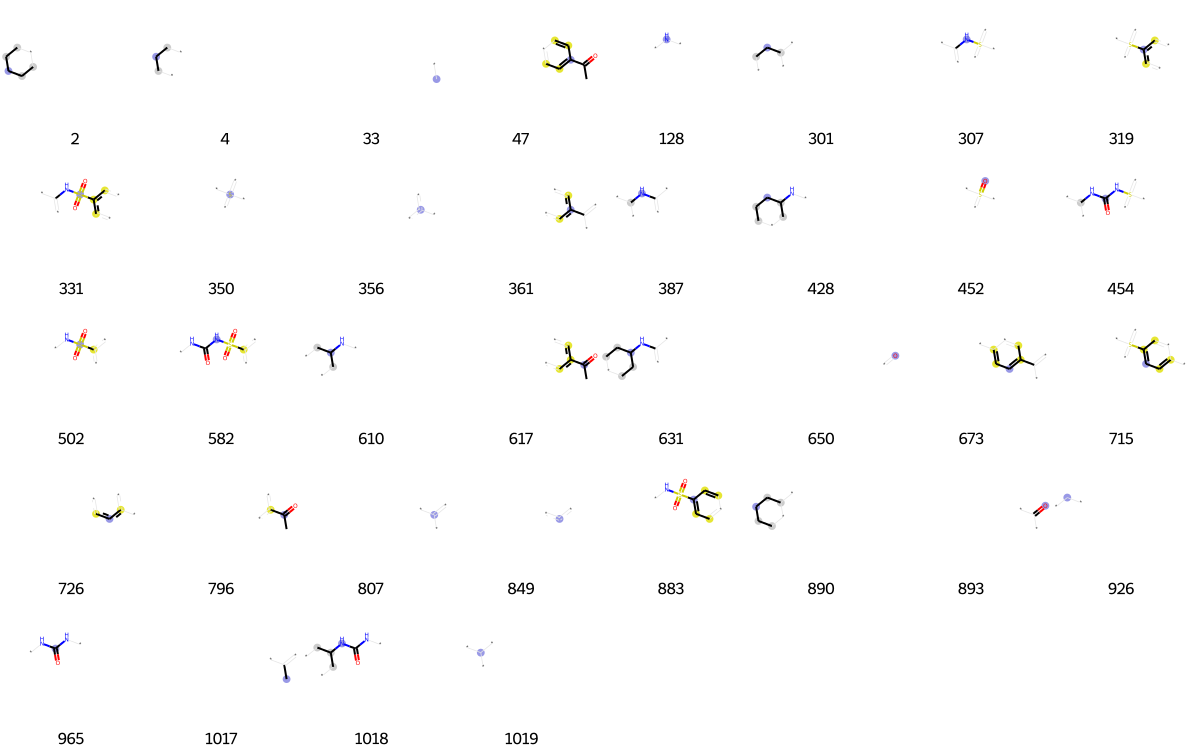

In [5207]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [5208]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[24,
 33,
 64,
 77,
 80,
 121,
 139,
 165,
 175,
 177,
 187,
 212,
 216,
 271,
 356,
 446,
 514,
 561,
 588,
 597,
 623,
 641,
 652,
 659,
 684,
 693,
 714,
 726,
 816,
 849,
 875,
 881,
 887,
 926,
 927,
 935,
 946,
 955,
 956]

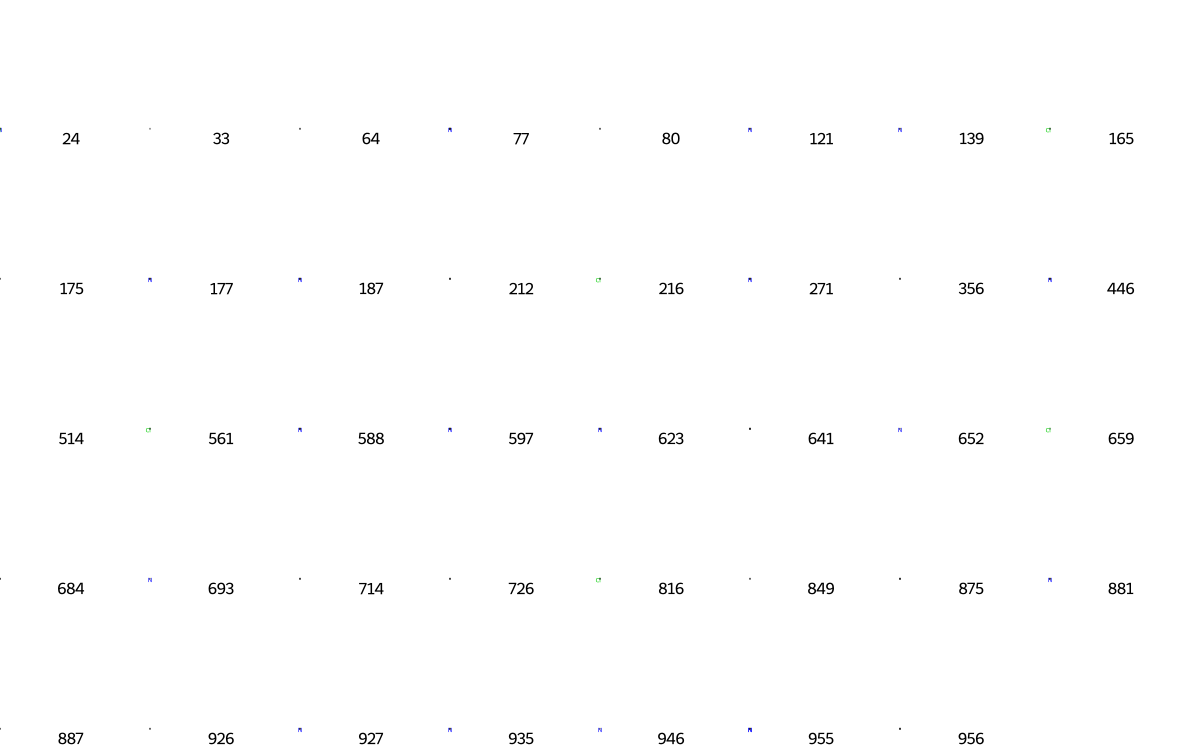

In [5209]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [5210]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[15,
 33,
 64,
 80,
 119,
 128,
 134,
 199,
 288,
 294,
 303,
 333,
 350,
 356,
 366,
 392,
 420,
 452,
 475,
 502,
 549,
 561,
 591,
 592,
 602,
 650,
 659,
 667,
 726,
 732,
 794,
 849,
 862,
 887,
 974,
 992]

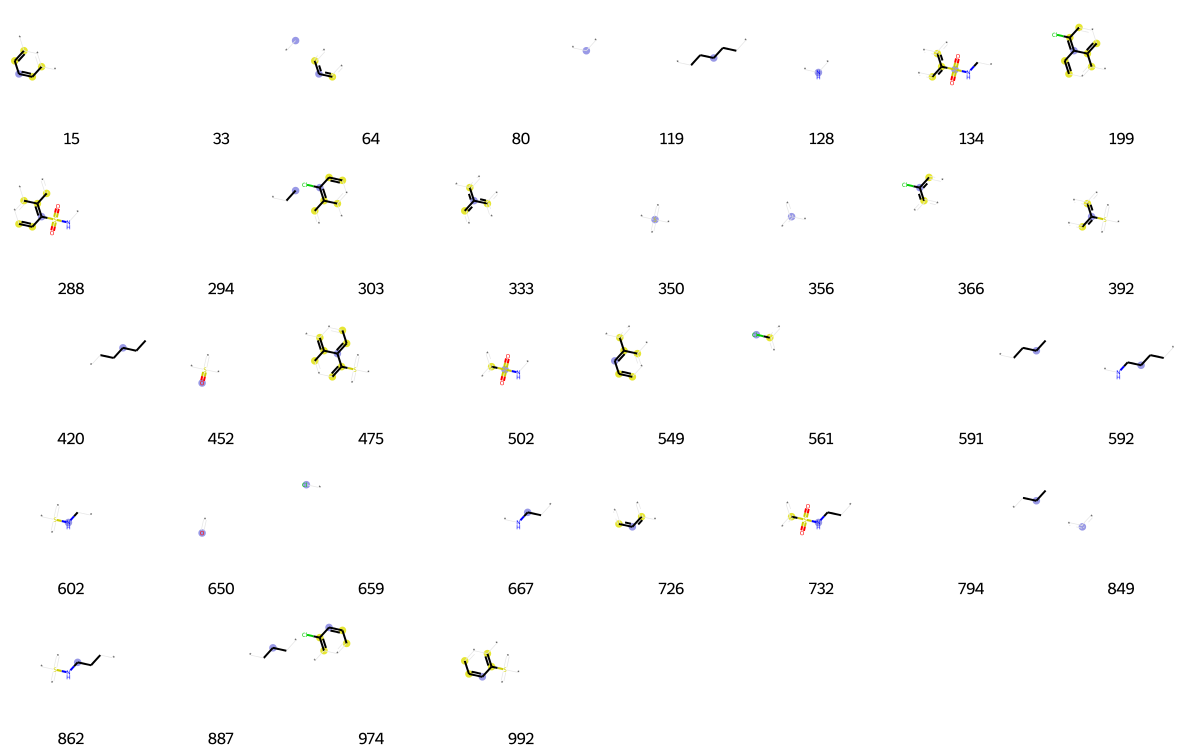

In [5211]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [5212]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[64,
 73,
 90,
 131,
 175,
 247,
 289,
 296,
 323,
 333,
 352,
 356,
 363,
 378,
 428,
 448,
 549,
 560,
 613,
 629,
 695,
 711,
 726,
 787,
 811,
 827,
 842,
 849,
 855,
 927,
 936,
 961,
 980]

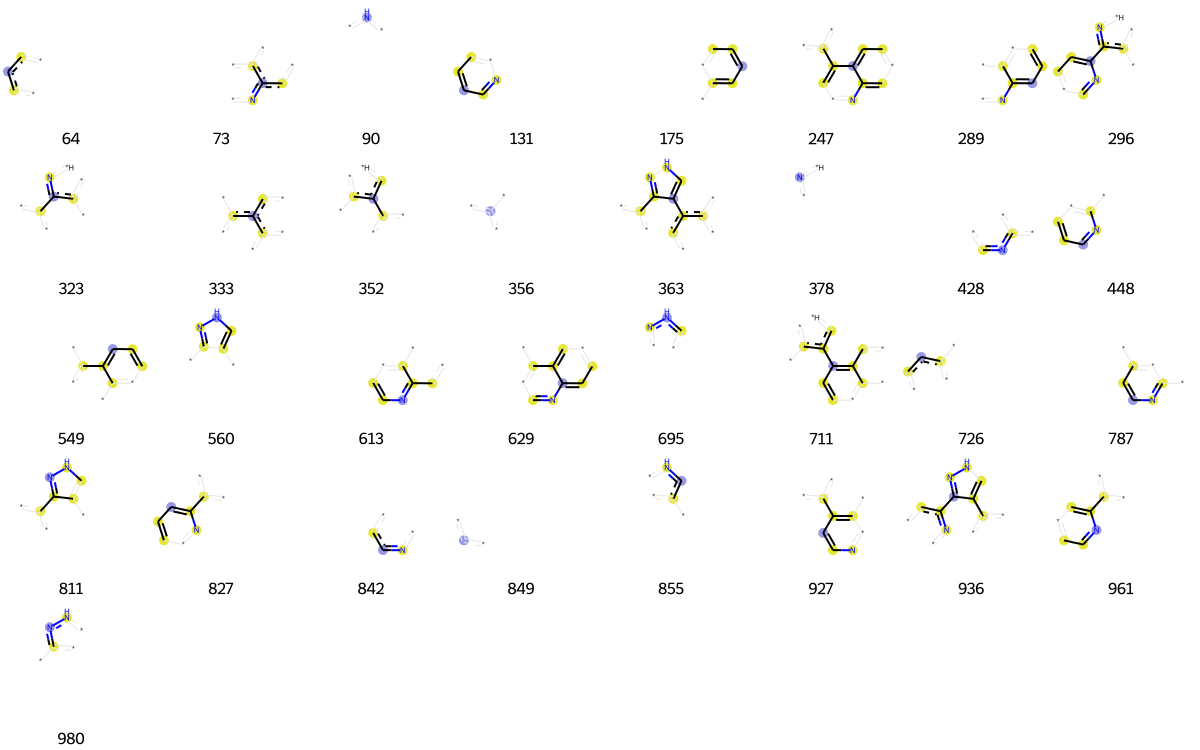

In [5213]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [5214]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[1,
 33,
 74,
 80,
 117,
 128,
 140,
 144,
 147,
 173,
 197,
 283,
 351,
 389,
 407,
 458,
 573,
 592,
 650,
 656,
 667,
 680,
 689,
 694,
 720,
 725,
 726,
 736,
 740,
 759,
 774,
 807,
 823,
 837,
 852,
 887,
 893,
 897,
 902,
 914,
 938,
 960,
 978,
 980,
 1019]

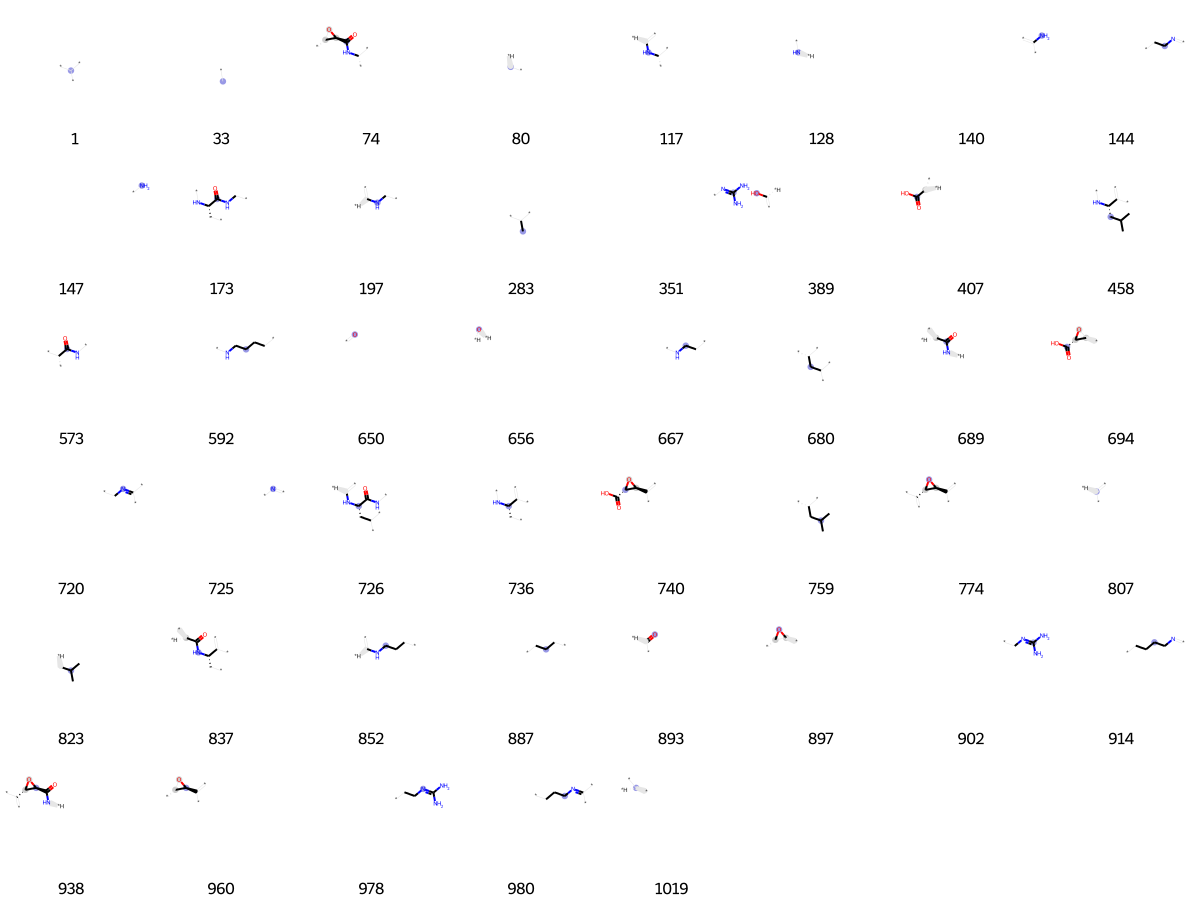

In [5215]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [5216]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[1,
 4,
 10,
 33,
 42,
 64,
 80,
 90,
 94,
 115,
 117,
 119,
 128,
 140,
 147,
 160,
 175,
 197,
 231,
 245,
 267,
 278,
 280,
 281,
 282,
 294,
 301,
 304,
 305,
 314,
 325,
 328,
 333,
 355,
 356,
 362,
 364,
 369,
 378,
 387,
 389,
 407,
 427,
 432,
 435,
 458,
 474,
 511,
 549,
 551,
 553,
 573,
 579,
 583,
 591,
 594,
 623,
 650,
 665,
 667,
 680,
 713,
 726,
 730,
 736,
 739,
 759,
 766,
 793,
 794,
 798,
 806,
 807,
 828,
 832,
 840,
 842,
 849,
 852,
 855,
 856,
 864,
 867,
 887,
 890,
 892,
 893,
 894,
 913,
 917,
 918,
 926,
 957,
 973,
 976,
 983,
 1006,
 1014,
 1017,
 1019]

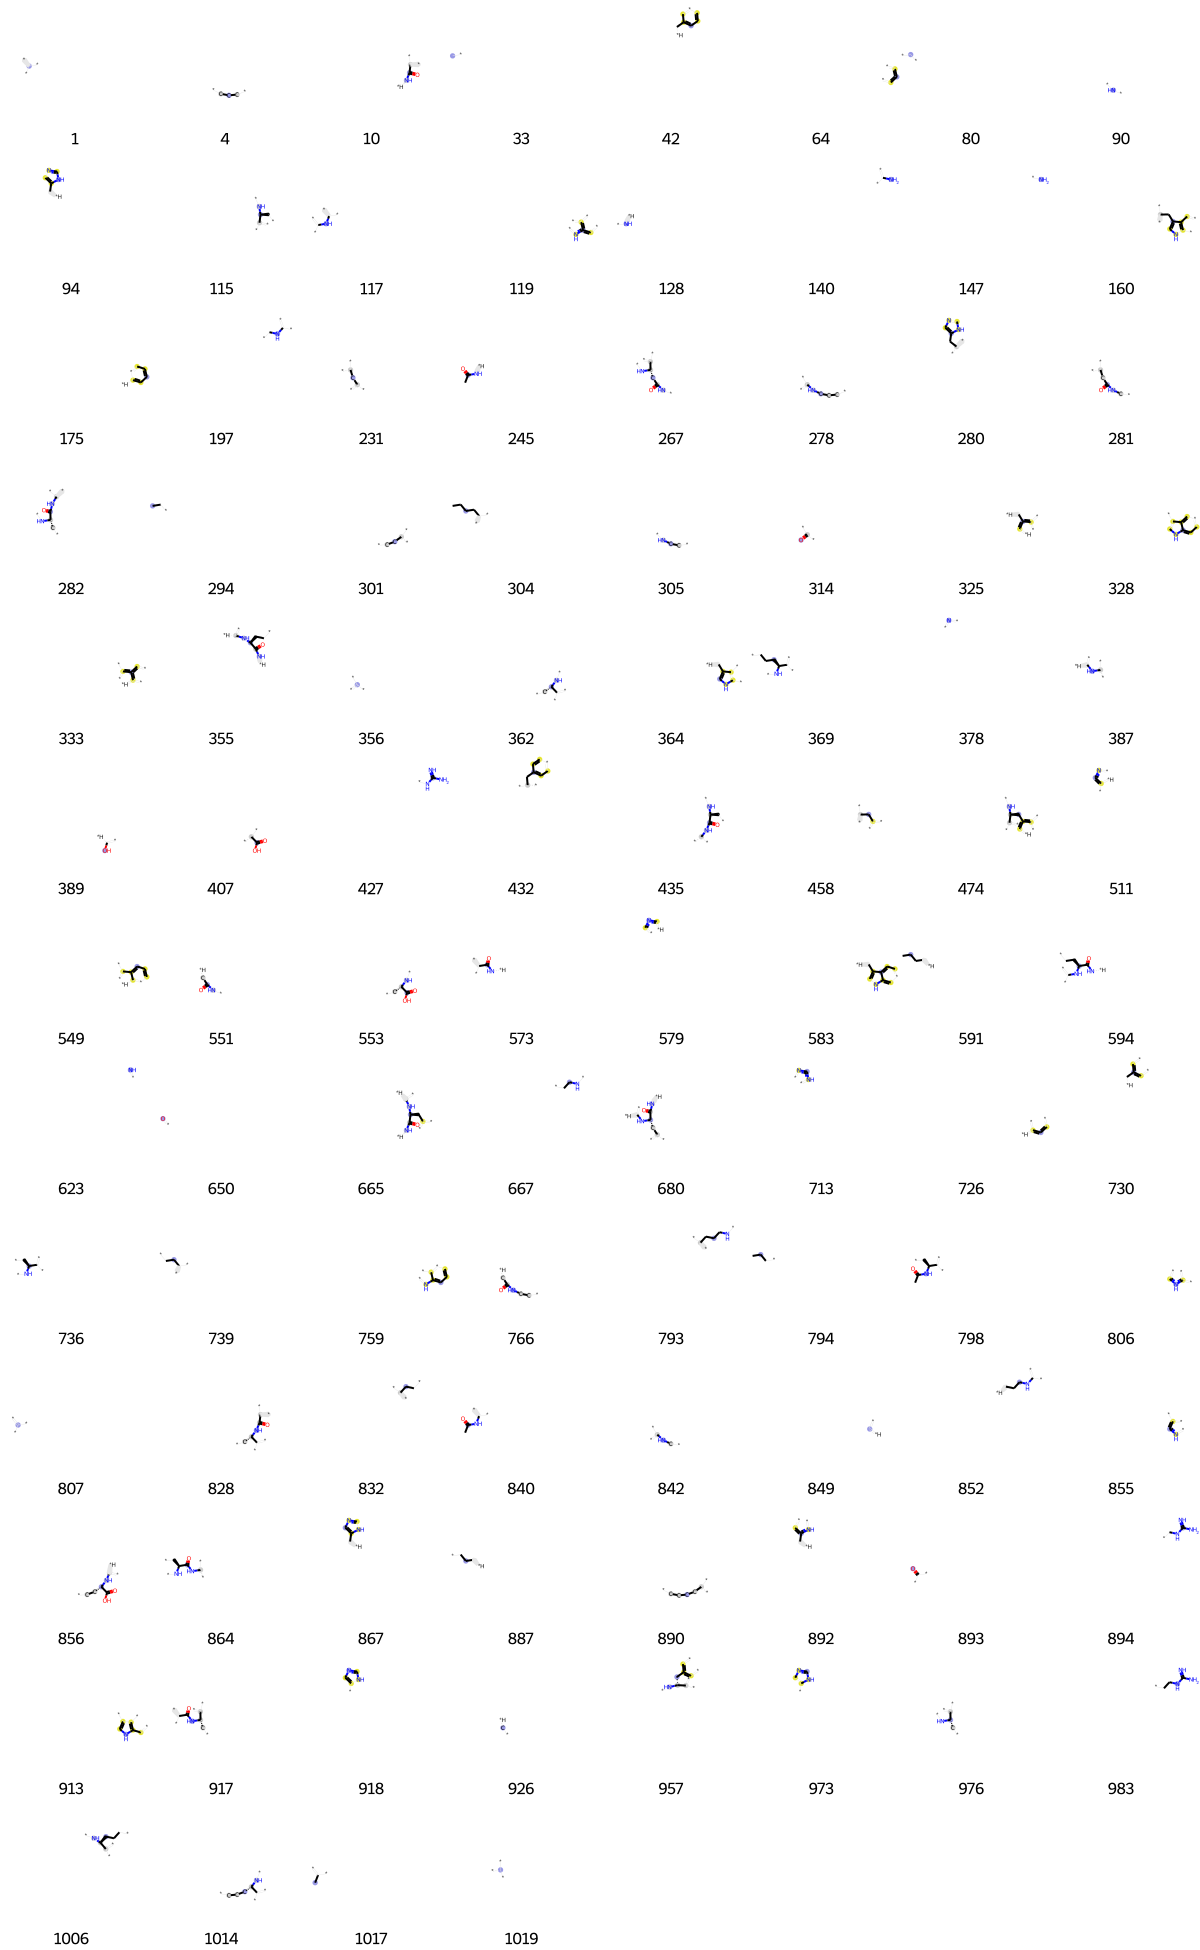

In [5217]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [5218]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[0,
 1,
 33,
 43,
 65,
 80,
 114,
 266,
 282,
 283,
 302,
 356,
 378,
 386,
 393,
 419,
 424,
 428,
 463,
 489,
 508,
 511,
 548,
 560,
 579,
 623,
 633,
 646,
 651,
 677,
 699,
 726,
 747,
 754,
 787,
 794,
 803,
 807,
 816,
 819,
 824,
 849,
 875,
 884,
 902,
 904,
 932,
 935,
 1005]

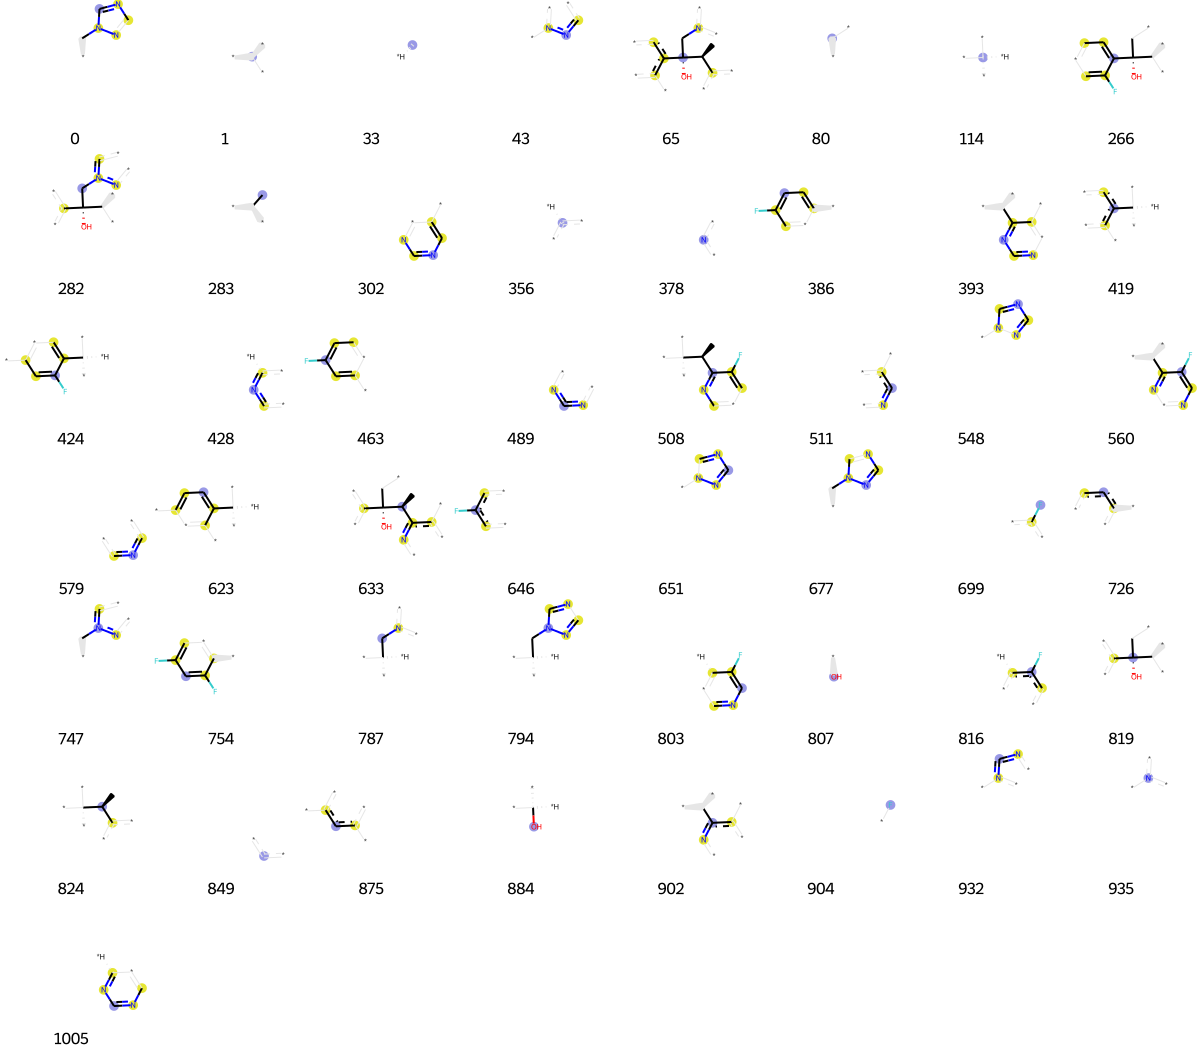

In [5219]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [5220]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[3,
 4,
 7,
 33,
 36,
 37,
 46,
 52,
 68,
 70,
 80,
 102,
 103,
 106,
 108,
 113,
 114,
 128,
 138,
 157,
 158,
 195,
 212,
 243,
 280,
 284,
 307,
 325,
 350,
 354,
 356,
 362,
 379,
 388,
 392,
 441,
 456,
 492,
 512,
 552,
 636,
 644,
 650,
 656,
 695,
 711,
 714,
 738,
 776,
 802,
 807,
 839,
 841,
 845,
 849,
 855,
 864,
 875,
 881,
 884,
 887,
 893,
 904,
 926,
 935,
 952,
 1007,
 1019]

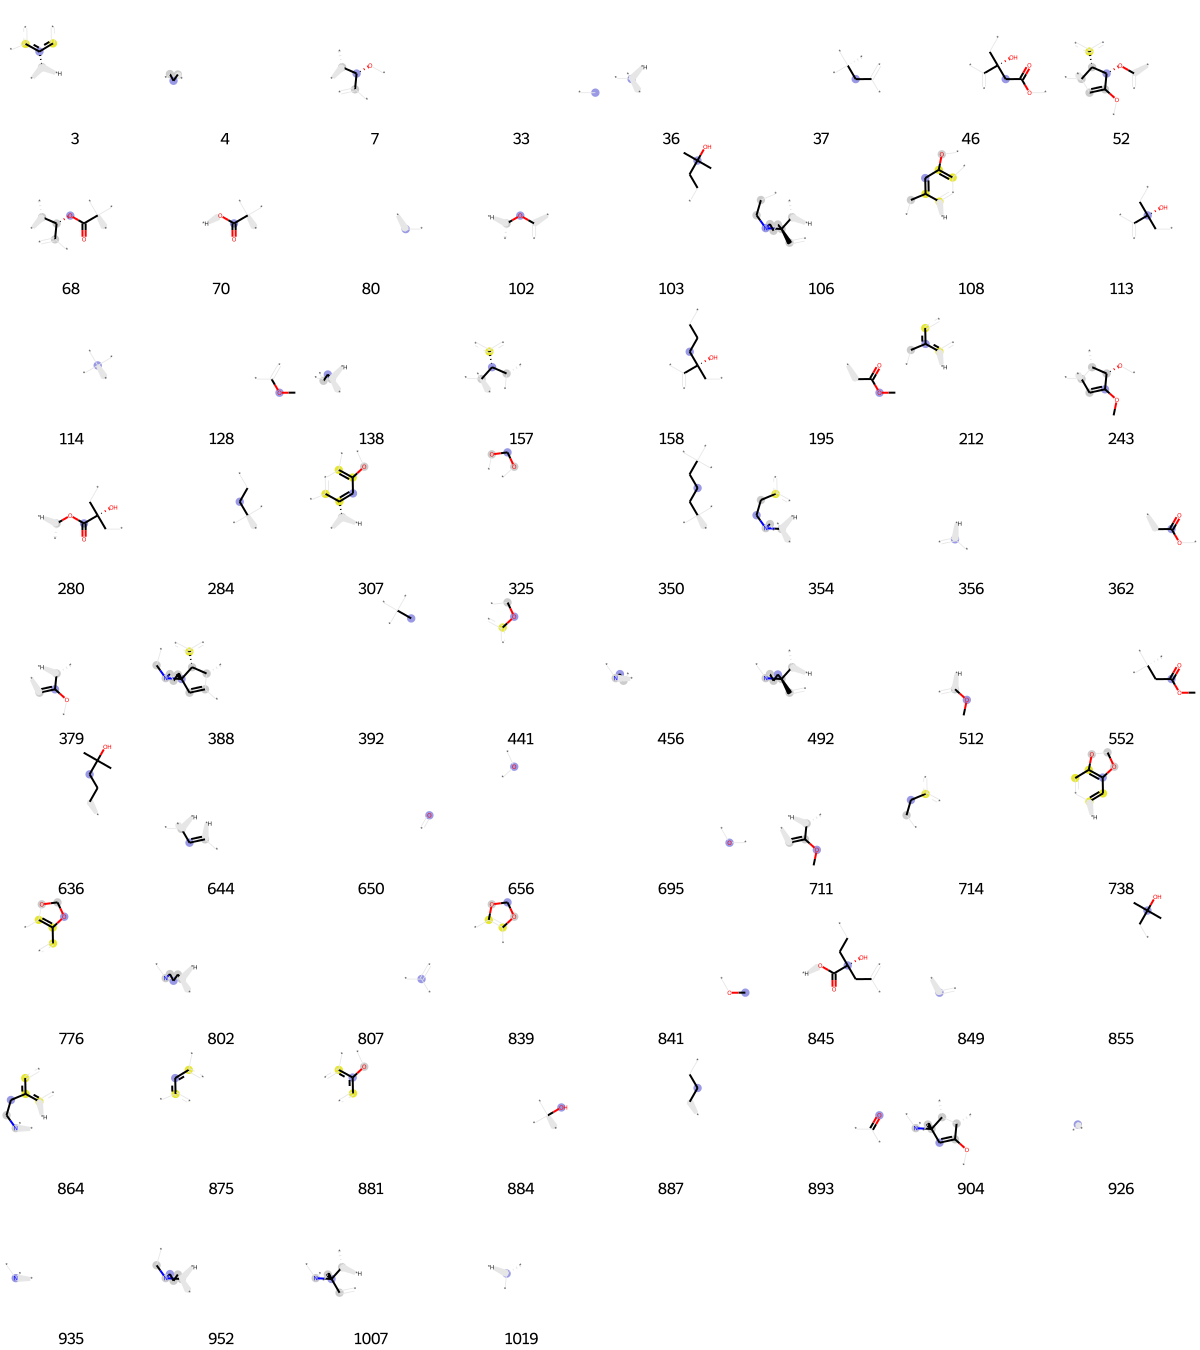

In [5221]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [5222]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[24,
 33,
 75,
 112,
 114,
 128,
 130,
 140,
 147,
 191,
 208,
 211,
 213,
 309,
 356,
 358,
 360,
 361,
 378,
 392,
 432,
 433,
 491,
 500,
 568,
 570,
 575,
 603,
 650,
 673,
 674,
 701,
 703,
 708,
 726,
 777,
 790,
 807,
 813,
 831,
 843,
 849,
 875,
 893,
 910]

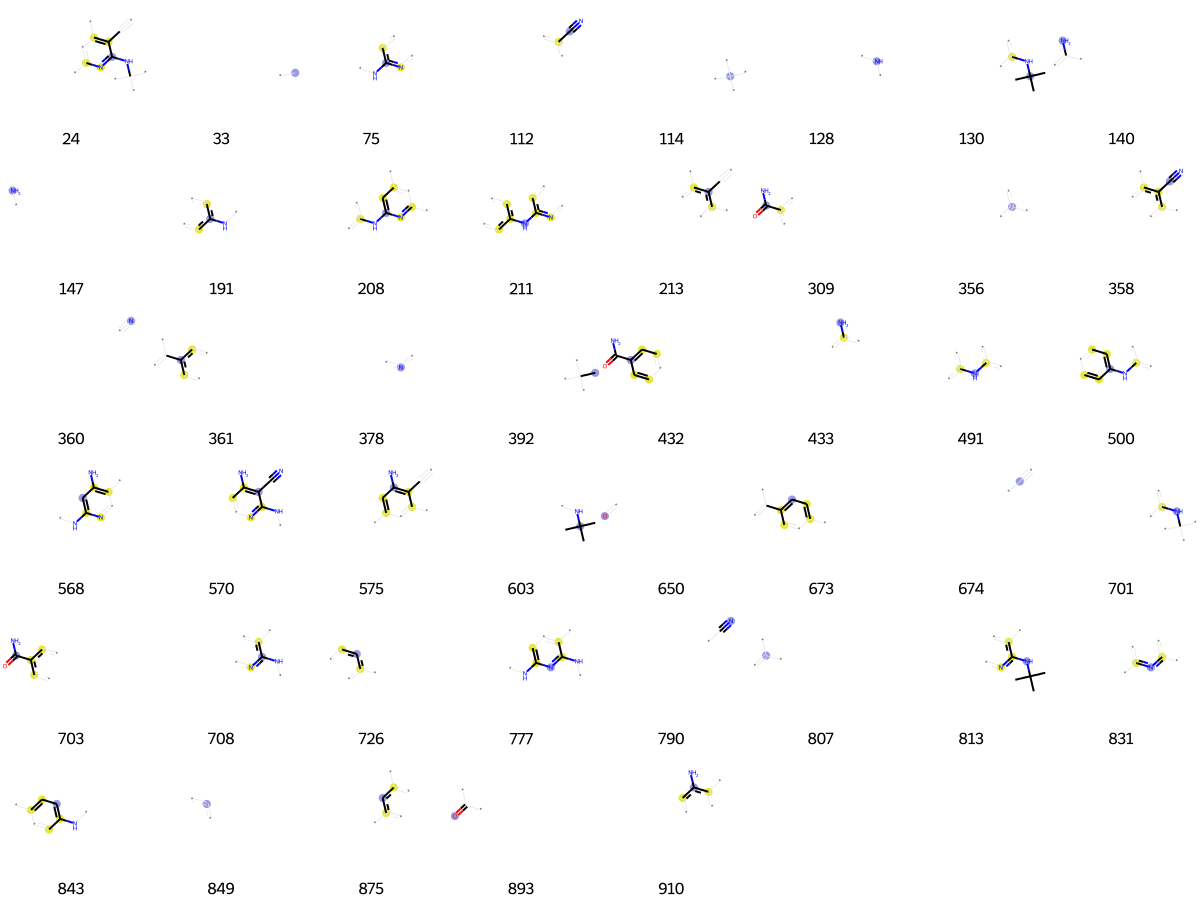

In [5223]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [5224]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[33,
 36,
 59,
 64,
 73,
 175,
 178,
 207,
 212,
 219,
 221,
 249,
 250,
 262,
 276,
 289,
 342,
 352,
 356,
 378,
 405,
 507,
 512,
 594,
 641,
 649,
 668,
 672,
 677,
 695,
 726,
 739,
 831,
 841,
 849,
 875,
 926,
 935,
 940,
 946,
 997]

In [5225]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[64,
 80,
 90,
 119,
 121,
 128,
 144,
 175,
 218,
 219,
 225,
 237,
 299,
 301,
 325,
 328,
 333,
 356,
 361,
 364,
 387,
 389,
 456,
 458,
 476,
 486,
 549,
 583,
 610,
 631,
 641,
 650,
 667,
 726,
 759,
 767,
 806,
 807,
 849,
 855,
 893,
 913,
 926,
 935,
 961,
 1019]

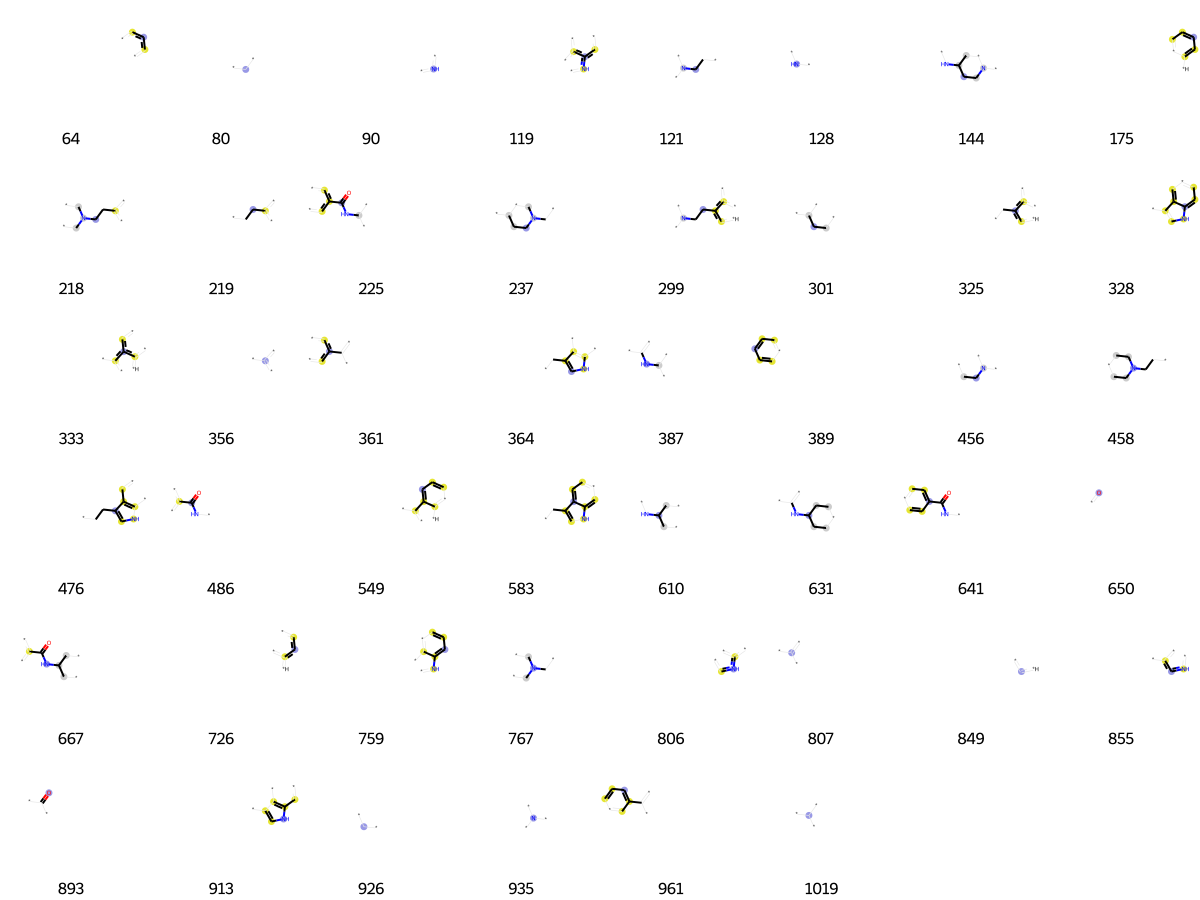

In [5226]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [5227]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[5,
 99,
 128,
 151,
 152,
 185,
 200,
 202,
 216,
 338,
 353,
 356,
 366,
 460,
 486,
 561,
 578,
 586,
 650,
 659,
 723,
 792,
 807,
 842,
 849,
 875,
 893,
 894,
 947,
 985,
 1011]

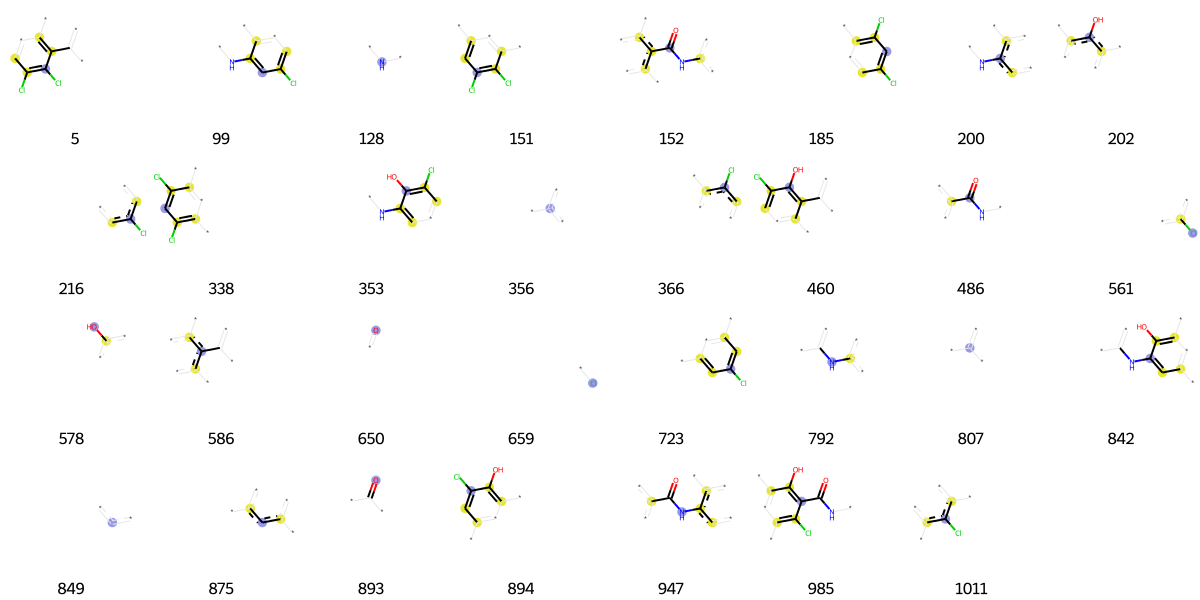

In [5228]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [5229]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[1,
 33,
 42,
 58,
 64,
 79,
 80,
 86,
 90,
 117,
 119,
 121,
 128,
 140,
 147,
 175,
 188,
 259,
 283,
 325,
 328,
 333,
 356,
 364,
 369,
 378,
 389,
 428,
 493,
 549,
 573,
 575,
 583,
 592,
 599,
 609,
 618,
 625,
 648,
 650,
 667,
 713,
 724,
 726,
 730,
 734,
 736,
 739,
 759,
 785,
 786,
 805,
 806,
 807,
 816,
 825,
 849,
 855,
 857,
 887,
 890,
 893,
 913,
 931,
 946,
 966,
 981,
 982,
 989,
 992,
 1007]

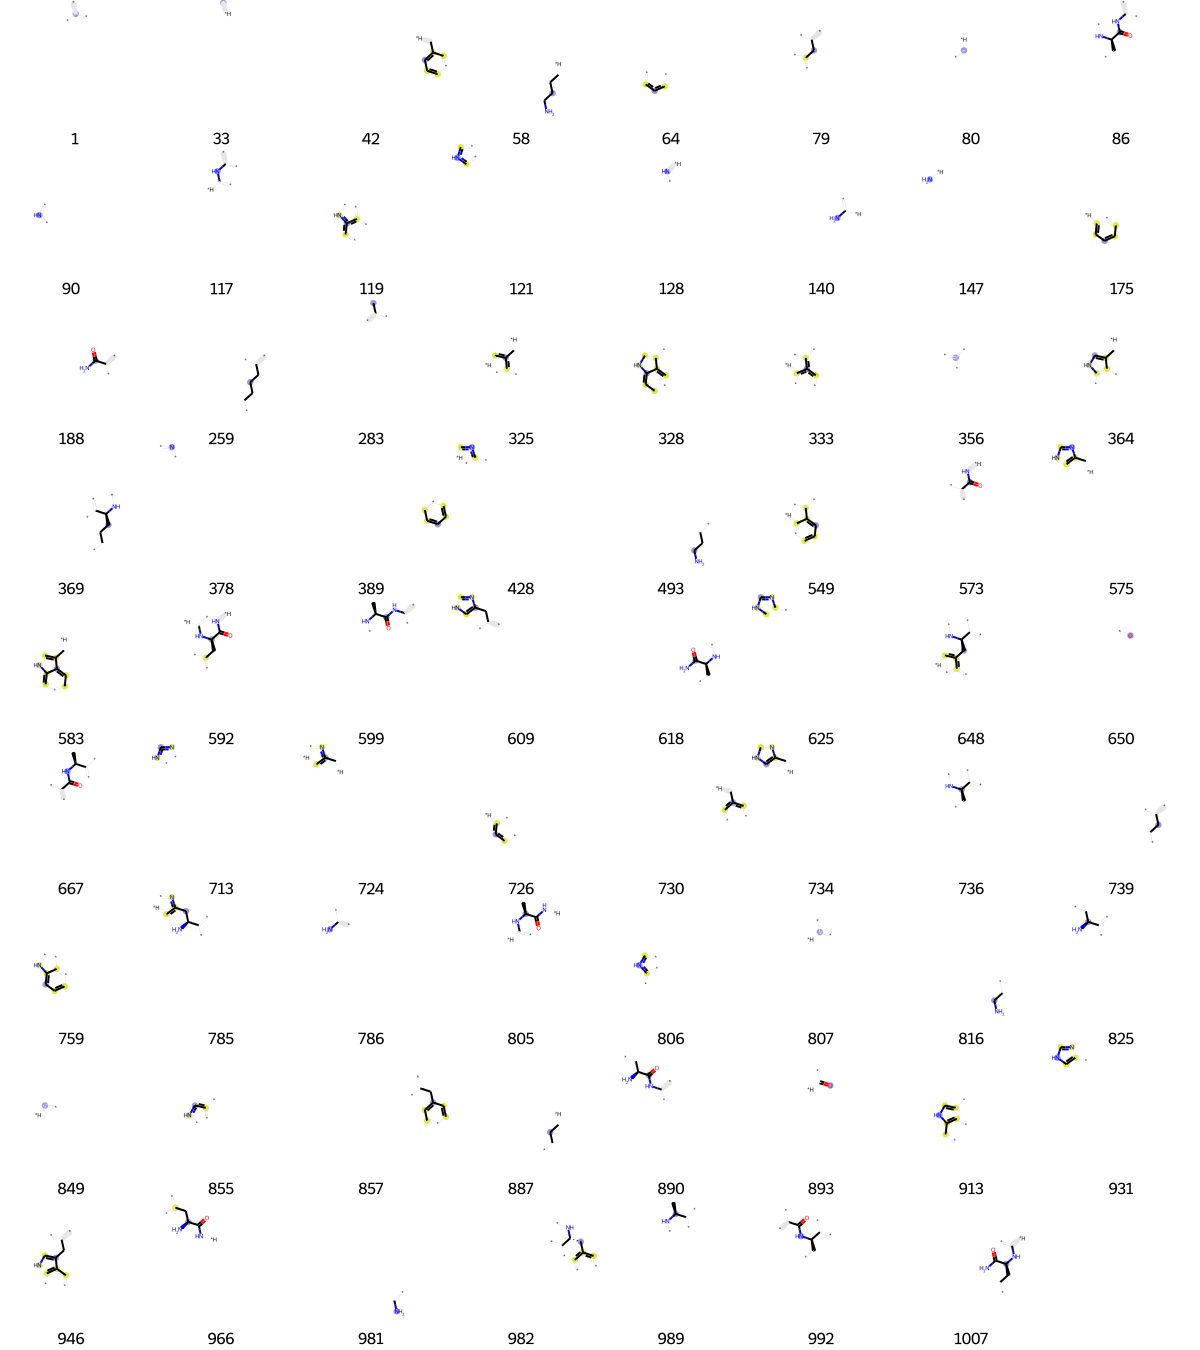

In [5230]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [5231]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[4,
 33,
 34,
 65,
 80,
 99,
 114,
 158,
 191,
 294,
 314,
 356,
 456,
 650,
 697,
 714,
 798,
 926,
 935,
 1017]

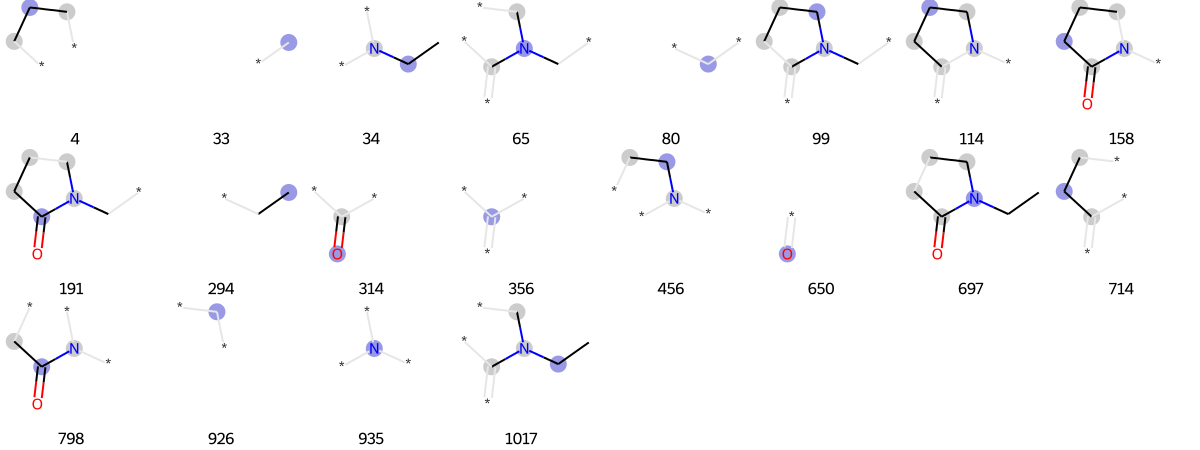

In [5232]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [5233]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[80, 86, 147, 263, 389, 493, 540, 650, 713, 749, 807, 816, 887, 893, 981]

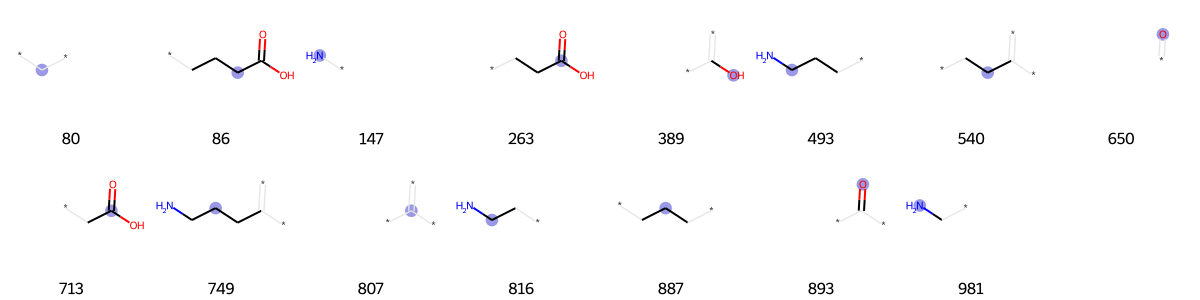

In [5234]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [5235]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[114,
 125,
 143,
 202,
 356,
 361,
 389,
 456,
 578,
 583,
 650,
 739,
 807,
 816,
 849,
 875,
 893]

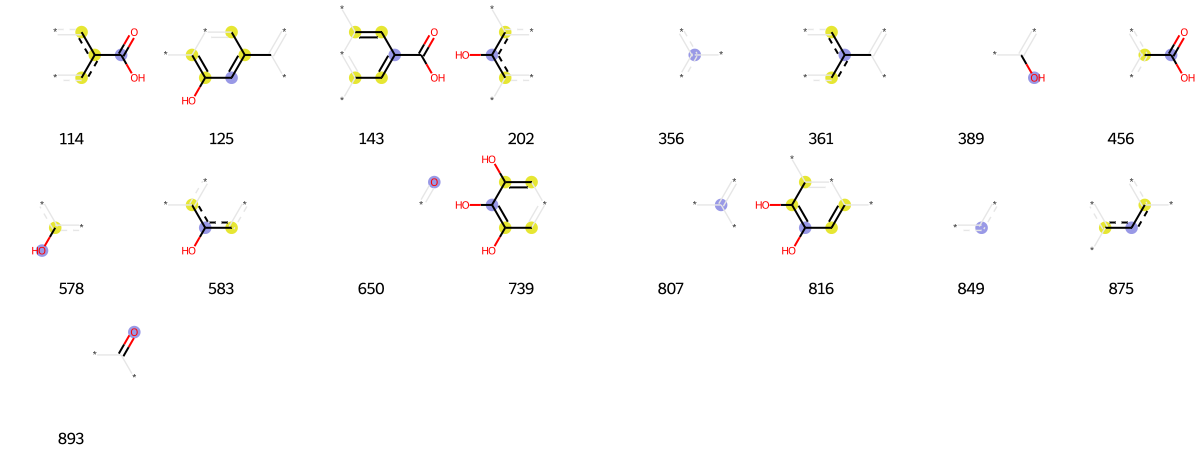

In [5236]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [5237]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[33,
 80,
 104,
 118,
 213,
 233,
 255,
 270,
 276,
 314,
 322,
 326,
 333,
 356,
 452,
 457,
 479,
 512,
 558,
 578,
 583,
 623,
 650,
 656,
 694,
 695,
 707,
 718,
 723,
 726,
 750,
 779,
 781,
 807,
 809,
 831,
 841,
 849,
 875,
 916,
 923,
 933,
 958,
 1010,
 1014,
 1017,
 1019]

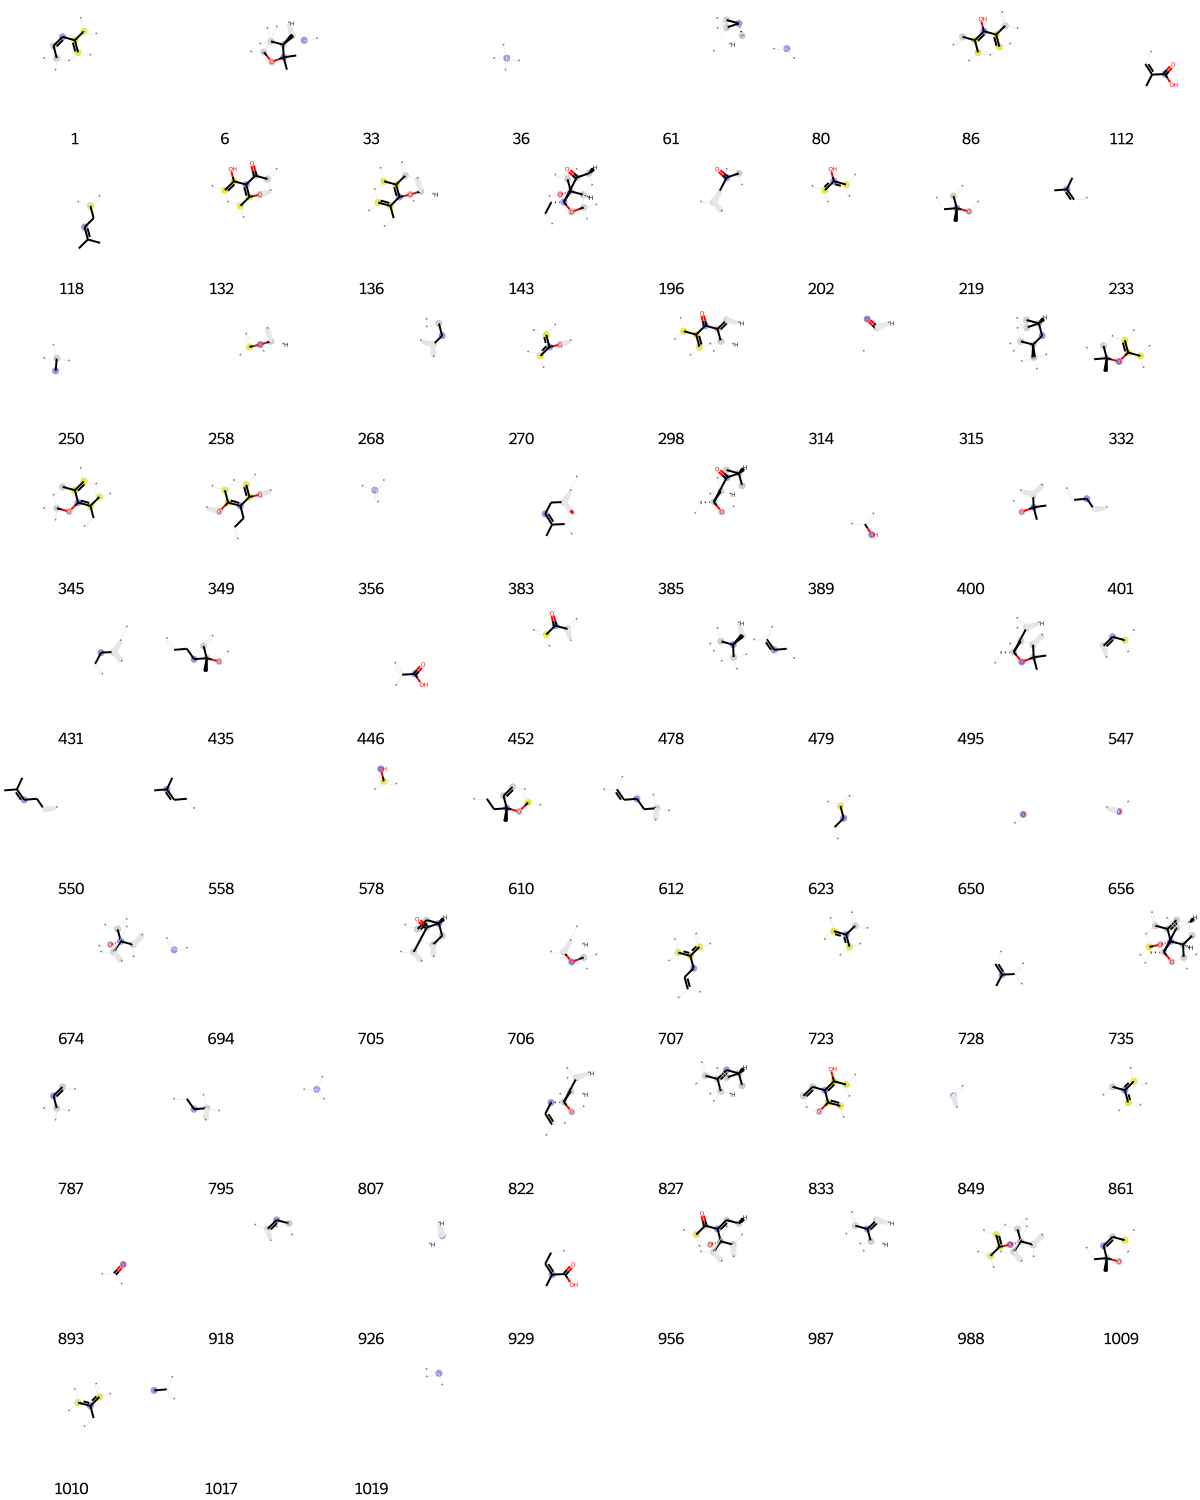

In [5238]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [5239]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[4,
 15,
 56,
 64,
 90,
 106,
 284,
 305,
 314,
 333,
 350,
 356,
 366,
 378,
 392,
 400,
 428,
 440,
 445,
 452,
 456,
 475,
 492,
 539,
 549,
 578,
 585,
 650,
 666,
 726,
 787,
 800,
 807,
 842,
 849,
 894,
 897,
 926,
 935,
 992,
 996,
 1020]

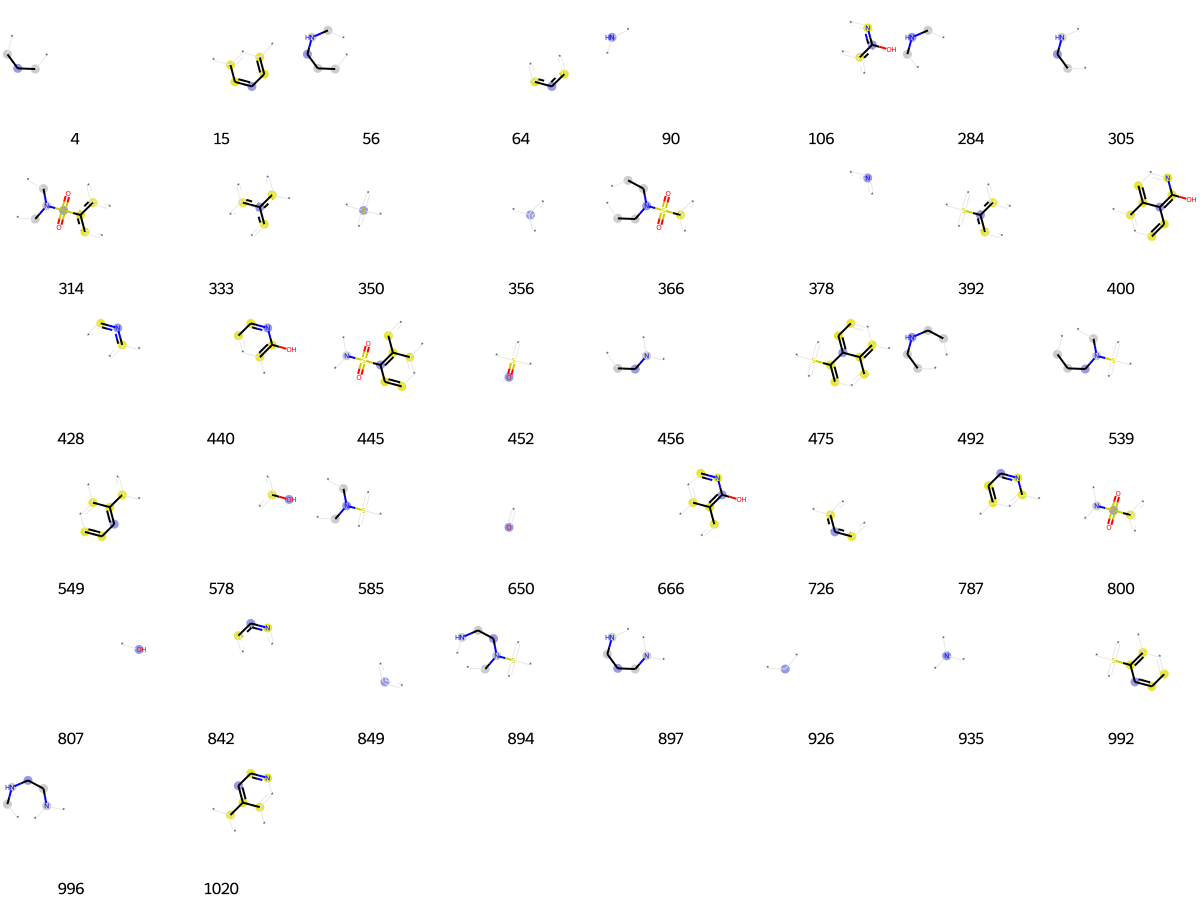

In [5240]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [5241]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[53,
 56,
 90,
 128,
 147,
 173,
 191,
 319,
 350,
 356,
 386,
 452,
 465,
 583,
 646,
 650,
 699,
 715,
 726,
 792,
 807,
 833,
 843,
 849,
 893,
 904,
 965,
 966]

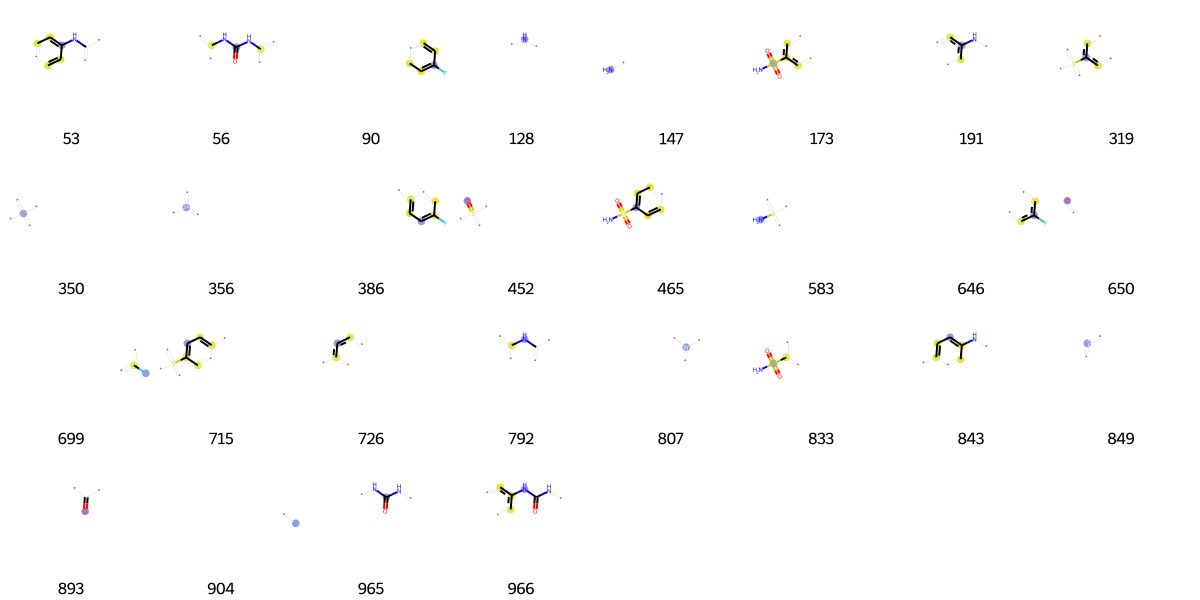

In [5242]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [5243]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[2,
 15,
 64,
 80,
 90,
 93,
 113,
 163,
 175,
 314,
 333,
 356,
 361,
 386,
 389,
 428,
 482,
 509,
 549,
 577,
 594,
 598,
 650,
 669,
 695,
 711,
 726,
 750,
 806,
 807,
 849,
 882,
 893,
 906,
 946,
 961,
 980]

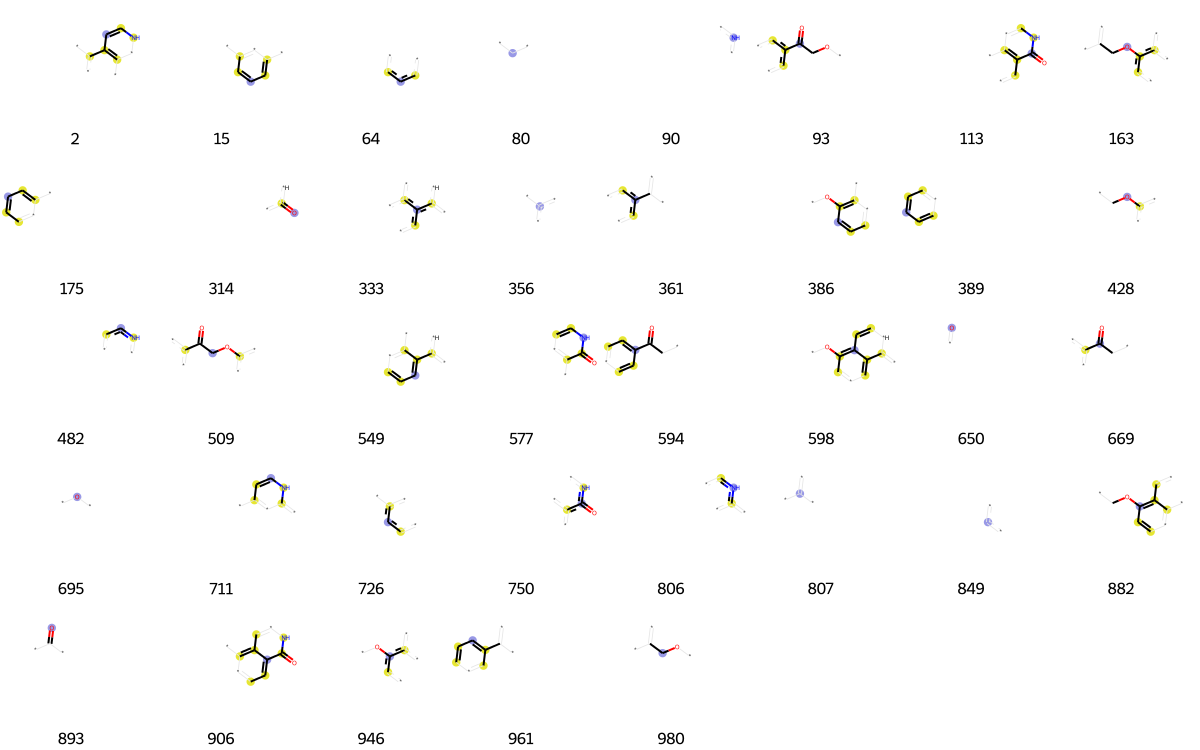

In [5244]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [5245]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[1,
 2,
 16,
 33,
 78,
 87,
 90,
 103,
 128,
 130,
 147,
 200,
 283,
 333,
 341,
 356,
 361,
 363,
 378,
 428,
 479,
 482,
 486,
 562,
 641,
 650,
 673,
 711,
 726,
 771,
 786,
 787,
 792,
 806,
 807,
 829,
 842,
 849,
 893,
 947]

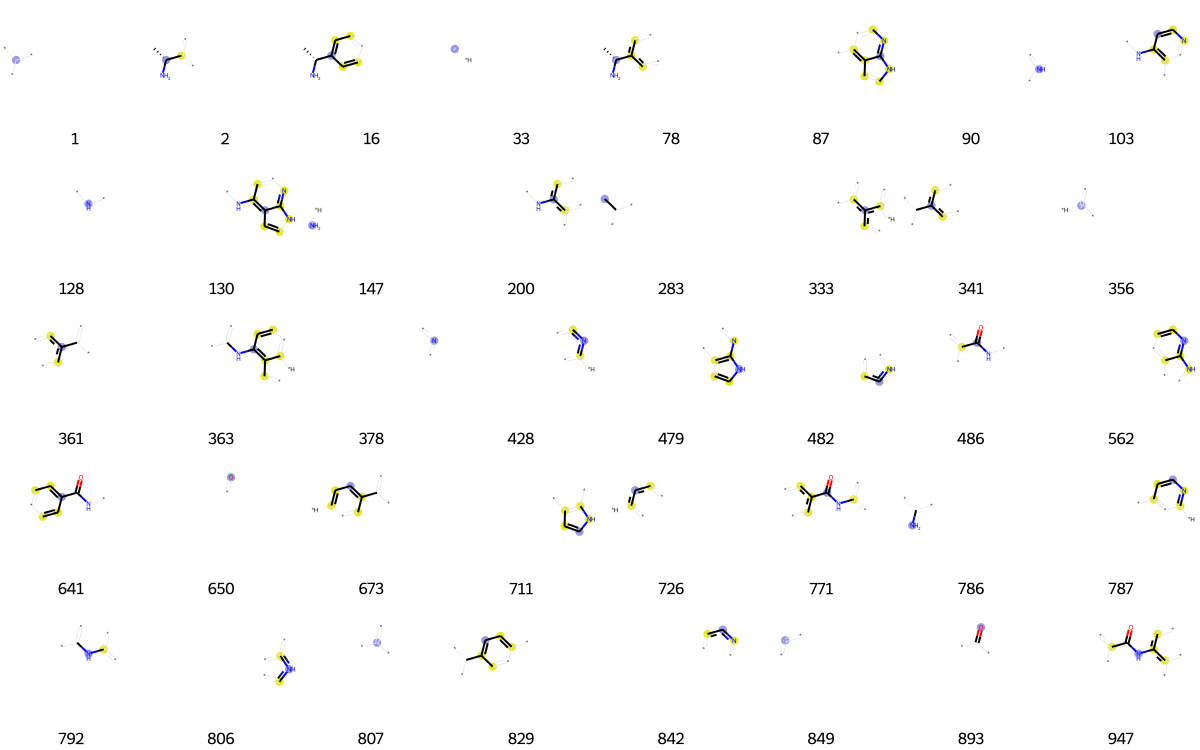

In [5246]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [5247]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[1,
 33,
 64,
 84,
 175,
 190,
 314,
 352,
 356,
 385,
 452,
 650,
 698,
 707,
 726,
 744,
 747,
 849,
 859,
 939,
 984]

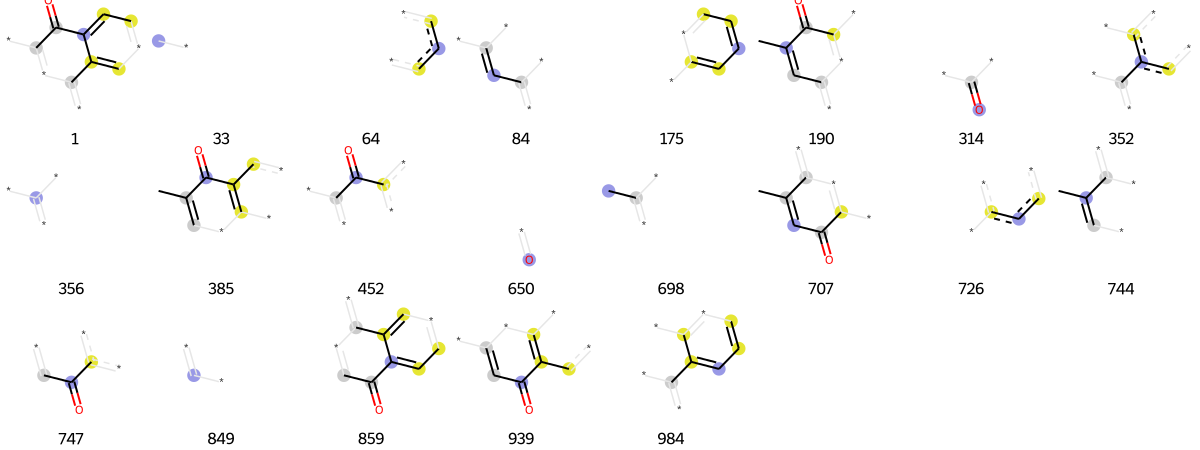

In [5248]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [5249]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[1,
 80,
 114,
 128,
 134,
 136,
 162,
 222,
 318,
 343,
 350,
 356,
 371,
 375,
 429,
 452,
 476,
 482,
 497,
 502,
 503,
 527,
 537,
 561,
 576,
 650,
 659,
 675,
 726,
 807,
 848,
 849,
 850,
 898,
 904,
 908,
 917]

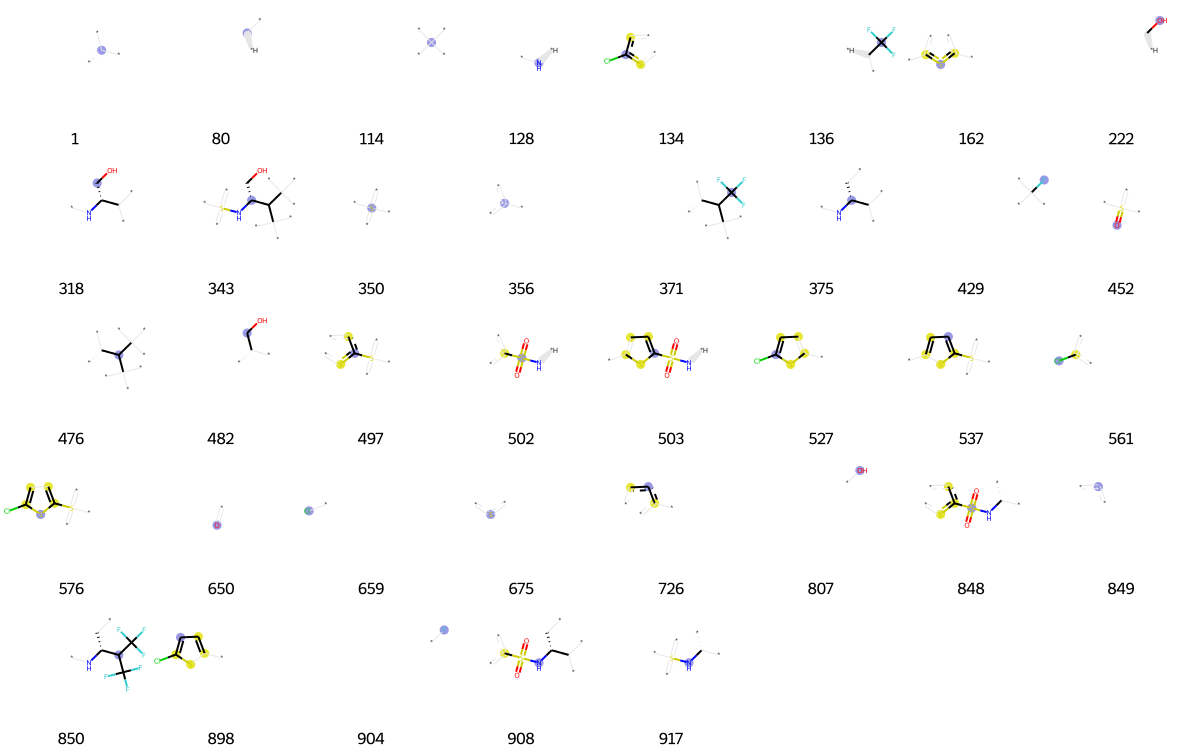

In [5250]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [5251]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[34,
 36,
 80,
 90,
 121,
 130,
 132,
 133,
 138,
 256,
 356,
 361,
 386,
 408,
 427,
 456,
 458,
 484,
 540,
 556,
 594,
 607,
 625,
 646,
 650,
 653,
 669,
 673,
 693,
 699,
 726,
 728,
 767,
 807,
 849,
 887,
 893,
 904,
 909,
 926,
 935,
 953,
 1021]

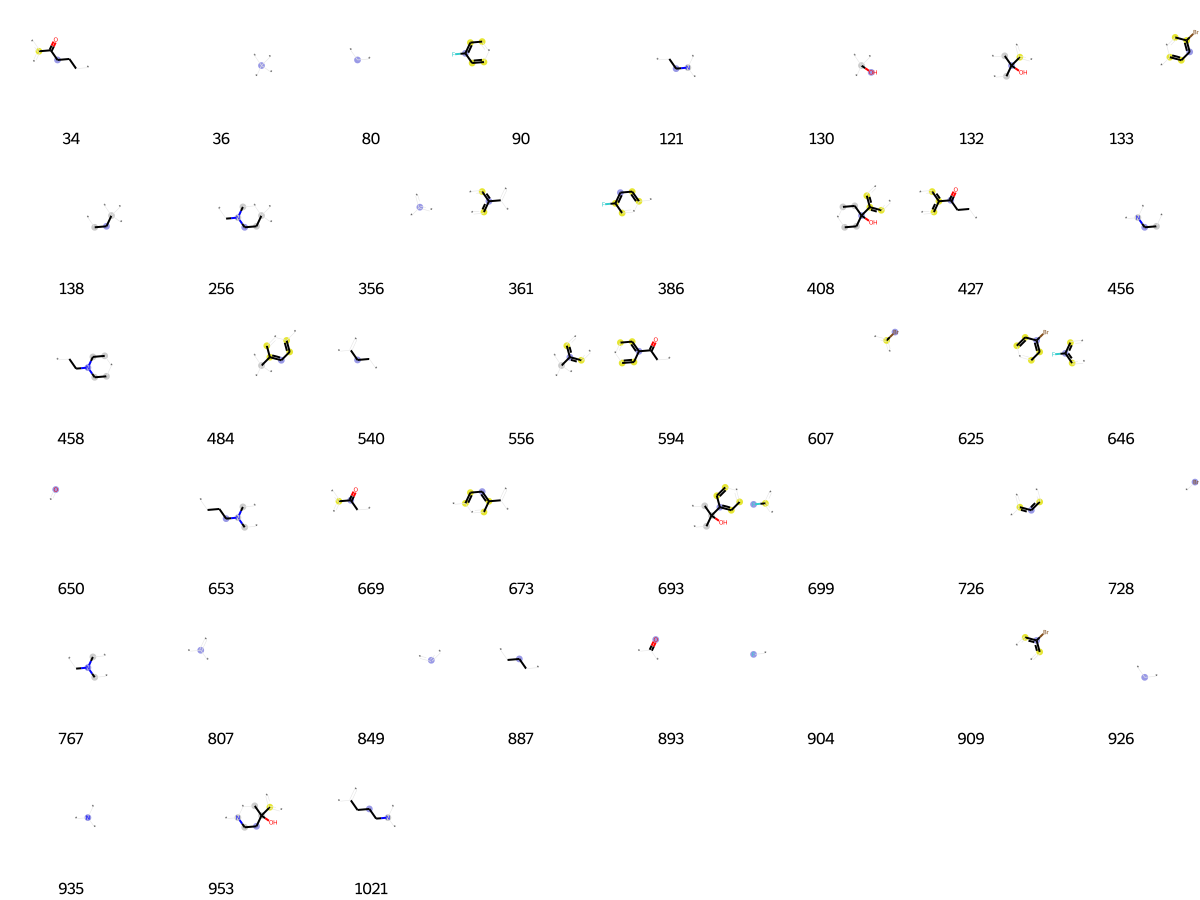

In [5252]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [5253]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[25,
 36,
 64,
 80,
 152,
 175,
 184,
 224,
 255,
 266,
 271,
 286,
 314,
 345,
 356,
 378,
 383,
 389,
 436,
 493,
 579,
 585,
 623,
 650,
 662,
 710,
 715,
 726,
 730,
 801,
 842,
 849,
 935,
 956]

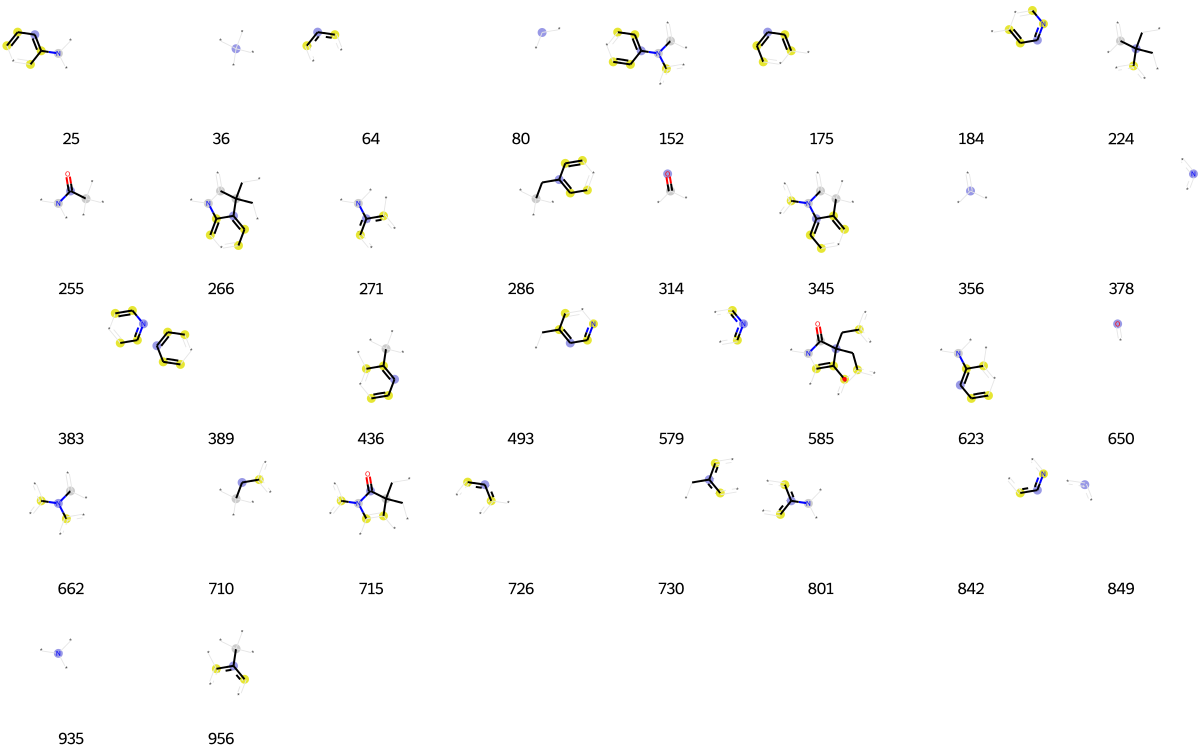

In [5254]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [5255]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[33,
 50,
 53,
 80,
 86,
 128,
 156,
 158,
 189,
 202,
 222,
 233,
 240,
 245,
 248,
 268,
 271,
 299,
 332,
 357,
 358,
 379,
 387,
 463,
 492,
 576,
 601,
 610,
 650,
 656,
 695,
 707,
 715,
 740,
 807,
 849,
 880,
 886,
 893,
 897,
 926,
 953,
 960,
 1017,
 1019]

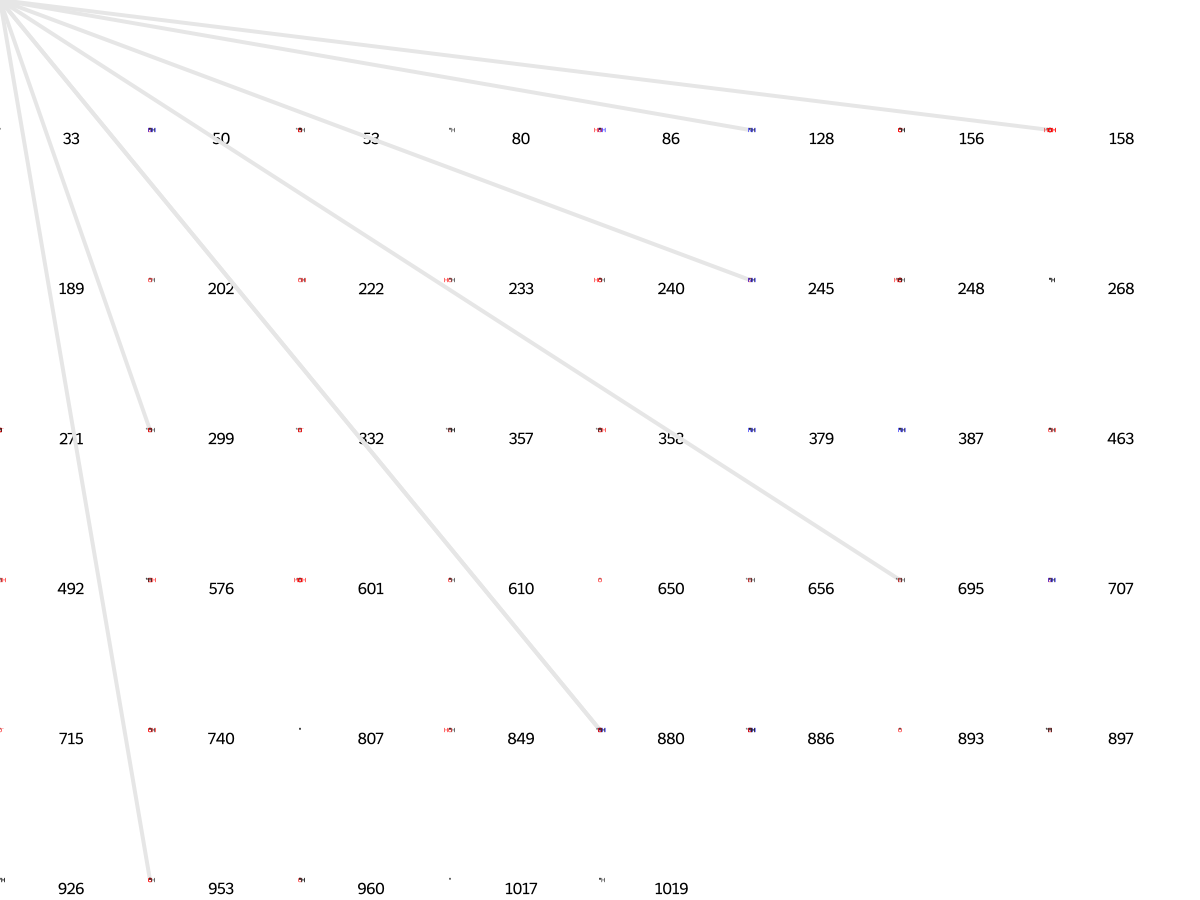

In [5256]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [5257]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[1,
 4,
 9,
 19,
 23,
 36,
 58,
 64,
 73,
 127,
 136,
 138,
 147,
 175,
 220,
 233,
 246,
 285,
 352,
 356,
 378,
 389,
 395,
 428,
 433,
 435,
 448,
 484,
 500,
 529,
 540,
 556,
 575,
 672,
 688,
 698,
 726,
 736,
 801,
 827,
 831,
 842,
 849,
 926,
 935,
 947,
 961,
 969,
 980,
 984,
 1004,
 1009,
 1012]

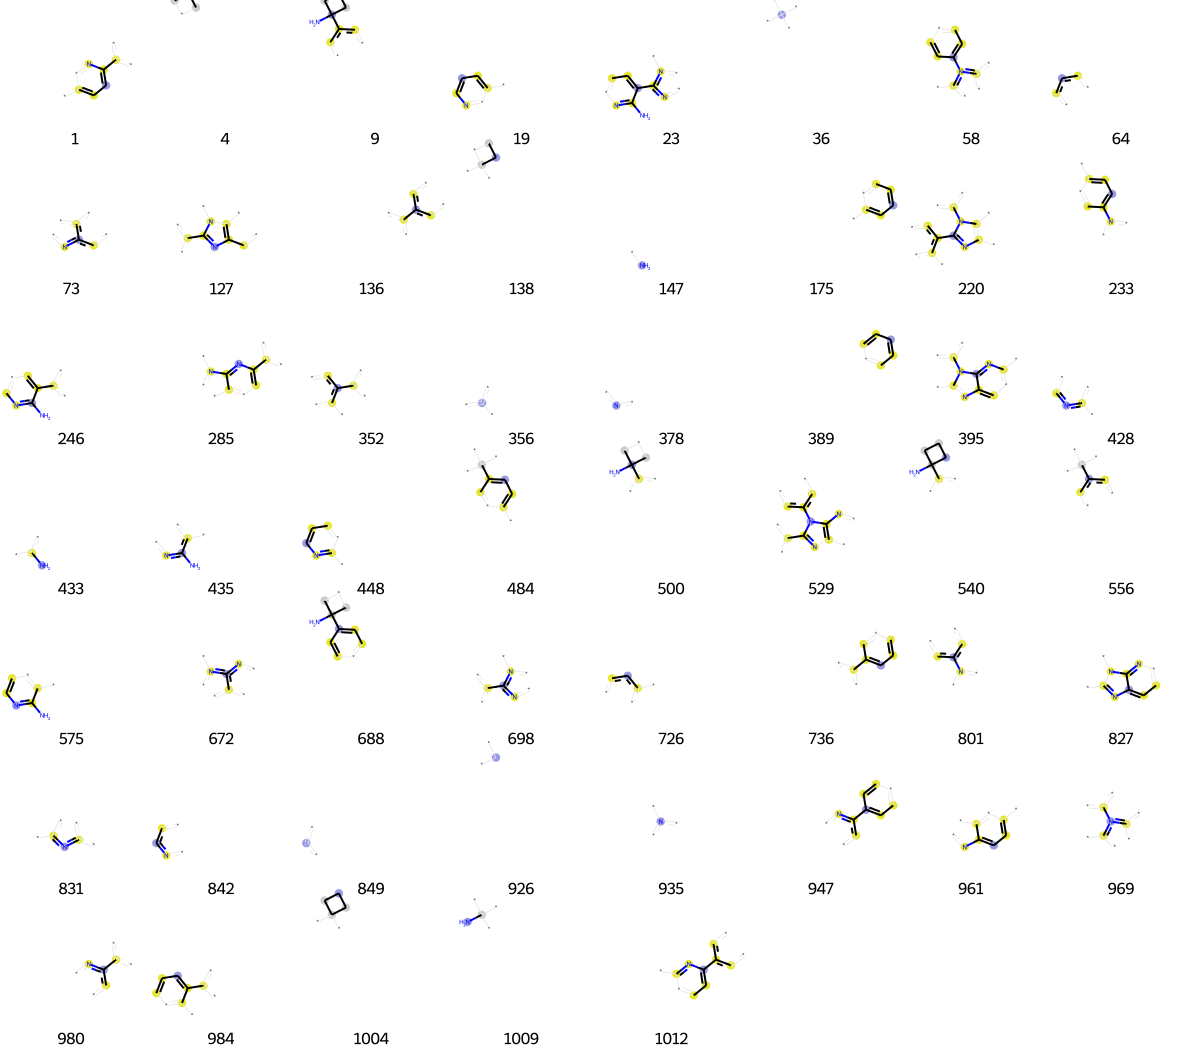

In [5258]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [5259]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[1,
 24,
 33,
 80,
 97,
 179,
 192,
 193,
 214,
 283,
 294,
 323,
 356,
 378,
 492,
 496,
 546,
 597,
 598,
 601,
 679,
 692,
 695,
 698,
 705,
 707,
 760,
 831,
 849,
 862,
 875,
 890,
 920,
 997]

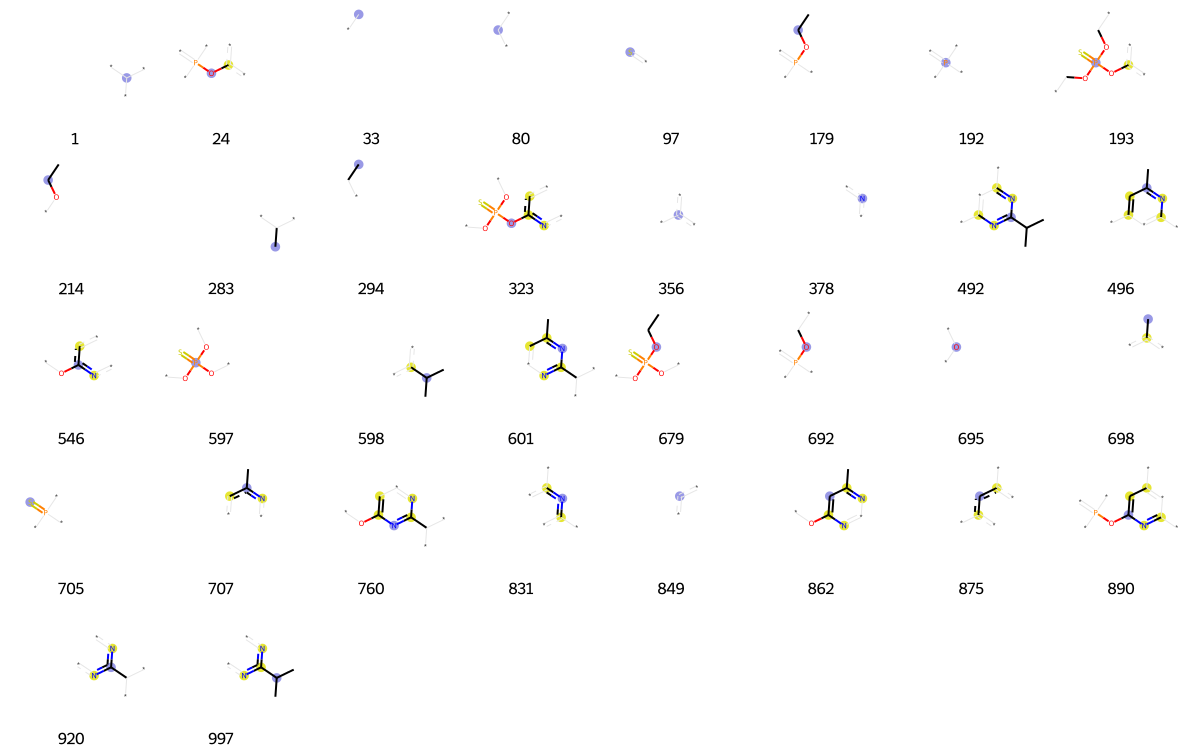

In [5260]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])